# 📈💭 **ISOC 731-Project**

---


### **Network formation games**

> In this project we will investigate the emergence of networks as a non centralised behaviour. Let’s assume that we have a set of N peoples {1, . . . , n} or entities, (companies, etc…) who are making connexion for benefit. We will investigate several increasingly realistic scenario in this project and look at the resulting networks properties.

**Prerequisite** : for doing the project we will be using graph processing library. You can use python based networkx or graphstream en java ou Boost::graph en C++. For visualising graph we will use the Gephi environment. So first step is to look at these two tools. 

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

### 1️⃣🔀 **Random graph**


---



> Let’s assume that each entity v decides uniformly and randomly to connect to any other entity, i.e., with a fix probability p an entity v ∈ {1, . . . , n} connects to any other of the N-1 other entities. When p is very small the resulting graph is not connected, i.e., we have a large number of small disconnected clusters. With increasing p there is more connectivity and when p=1 all nodes are connected to each other (we have a clique). Can you observe a minimal value of p where all entities are connected by a graph. In order to observe this, for all value of p (from 0.01 to 0.99 with a 0.01 step) , generate 100 graphs over 10 000 nodes and look at the size of the largest connected component (use networkx library in python for that purpose). Plot a graph with the percentage of the nodes in the largest component. Do you observe an interesting behaviour ? Show also the evolution of the node degree distribution. Can you guess the degree distribution ? Find interesting visualisations for being able to show the evolution with the confidence intervals. 

In [ ]:
nbNodes = 50

G = nx.empty_graph(nbNodes)
nbEdges = []

for i in range(1,100):
  p = i/100
  G.remove_edges_from(list(G.edges()))

  for n1 in G.nodes:
    for n2 in G.nodes:
      if n1 != n2 and p >= random.random():
        G.add_edge(n1,n2)

  nbEdges.append(len(G.edges()))

  # find the largest component
  Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
  G0 = G.subgraph(Gcc[0])
  percentage = round(len(G0.edges())/len(G.edges())*100, 2)

  # find the degree of analyse
  degree_analyse = sorted([d for n, d in G.degree()], reverse=True)

  # print(f"Graph number : {i}")
  # print(f"Edge prob : {p}")
  # print(f"Number of edge in graph : {len(G.edges())}")
  # print(f"Number of edge in subgraph of edge : {len(G0.edges())}")
  # print(f"% edge of graph in subgraph : {len(G0.edges())/len(G.edges())*100}")

  #Display
  plt.figure(figsize=(35,5))
  plt.clf()
  
  #Graph Général
  ax0 = plt.subplot(131)
  ax0.axis("off")
  ax0.set_title(f"Graph {i}")
  nx.draw_networkx(G, with_labels=False, node_size=150, font_color="green", ax=ax0)
  
  #Graph max component
  ax1 = plt.subplot(132)
  ax1.axis("off")
  ax1.set_title("Graph Largest Component")
  nx.draw_networkx(G0, with_labels=False, node_size=150, font_color="green", ax=ax1)
  
  #Hist Degree
  ax2 = plt.subplot(133)
  ax2.set_xlim(0, nbNodes)
  ax2.bar(*np.unique(degree_analyse, return_counts=True))
  ax2.set_title("Degree histogram")
  ax2.set_xlabel("Degree")
  ax2.set_ylabel("# of Nodes")

  plt.show()
 

### 2️⃣ **Simple graph formation game**
---


> Let’s assume that the value of an entity v ∈ {1, . . . , n}, N(v), is evaluated as the sum of the values of its direct neighbouring entities in the graph. The value of a nonconnected node is 0 and the value of a node connected only to a single other node is 1. Let’s assume the following game. Different entities choose each a random time Tv. At its time the entity Tv. looks at all order nodes and connect to the one that will maximises its value (it choose randomly in there is egality). Could you predict in advance what will be the resulting topology ? Which entity will get the largest value ? Develop a simulator that will simulate this simple graph formation game. Compare the resulting graph, the connectivity, the minimal distance between points, etc. with the random graphs. We will make this model a little more realistic by assuming that at the time of playing the connection game you cannot infer precisely the value of all nodes the value that we infer is uniformly distributed between 50% and 150% of its real value. When the connection is made the real value of neighbours revealed to both entities. What will change in the topology ? Do the topology change in between different runs ? What will be the distribution of node value at the end of the execution? You might need several run to get a stable distribution. Plot some of the resulting graph topologies. 


#### 2️⃣.1️⃣ **Without interfances**

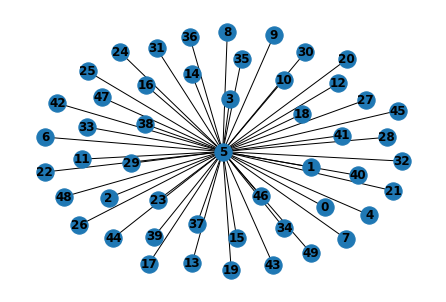

In [ ]:
# Without interferance

nbNodes = 50

G = nx.empty_graph(nbNodes)
nx.set_node_attributes(G, 0, 'value')
allNodes = list(G.nodes())
random.shuffle(allNodes)

for node in allNodes:
    # List of all nodes with their values, current one (randomNode) removed
    nodeValues = list(G.nodes(data=True))
    nodeValues.remove((node,G.nodes[node]))

    # Get the higher value of all the other nodes
    higherValue = max(nodeValues,key=lambda n:n[1]['value'])[1]['value']
    nodeValues = list(filter(lambda n: n[1]['value'] == higherValue, nodeValues))
    nodeToConnect = random.choice(nodeValues)[0]

    # If there isn't already an edge between the two nodes
    if G.has_edge(nodeToConnect,node) == False:
        G.add_edge(node,nodeToConnect)   
        G.nodes[node]['value'] += 1
        G.nodes[nodeToConnect]['value'] += 1
    
nx.draw(G,with_labels=True, font_weight='bold')

#### 2️⃣.2️⃣ **With interfances**

In [ ]:
# With interferance
def generate_graph_with_interferance(nbNodes):
  G = nx.empty_graph(nbNodes)
  nx.set_node_attributes(G, 0, 'value')
  nx.set_node_attributes(G, 0, 'interferedValue')

  allNodes = list(G.nodes())
  random.shuffle(allNodes)

  for node in allNodes:
      # List of all nodes with their values, current one (randomNode) removed
      nodeValues = list(G.nodes(data=True))
      nodeValues.remove((node,G.nodes[node]))

      for n in nodeValues:
        n[1]["interferedValue"] = (random.randrange(20,180)/100)*n[1]["value"]

      # Get the higher value of all the other nodes
      higherValue = max(nodeValues,key=lambda n:n[1]['interferedValue'])[1]['interferedValue']
      nodeValues = list(filter(lambda n: n[1]['interferedValue'] == higherValue, nodeValues))
      nodeToConnect = random.choice(nodeValues)[0]

      # If there isn't already an edge between the two nodes
      if G.has_edge(nodeToConnect,node) == False:
        G.add_edge(node,nodeToConnect)   
        G.nodes[node]['value'] += 1
        G.nodes[nodeToConnect]['value'] += 1

  return G

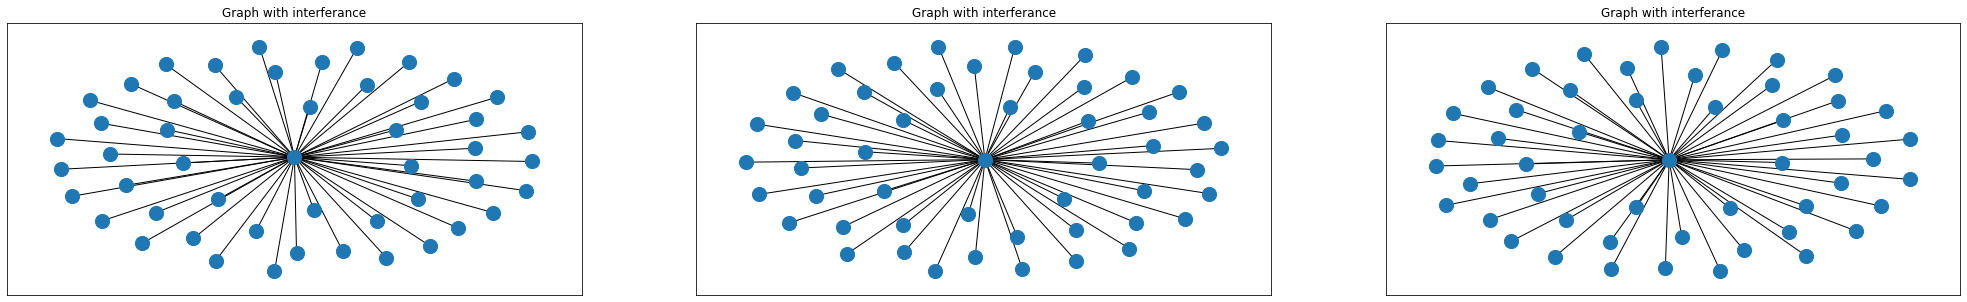

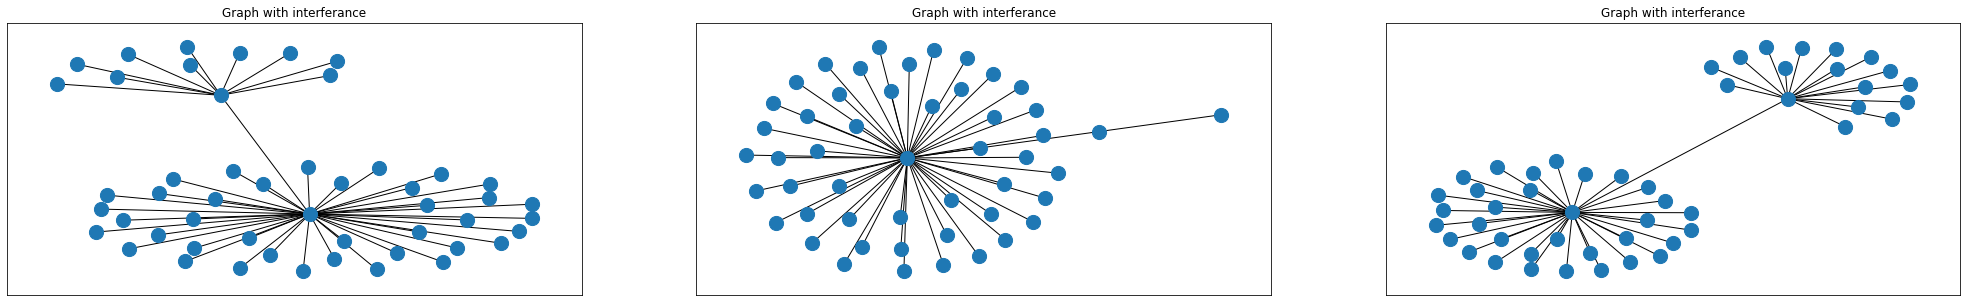

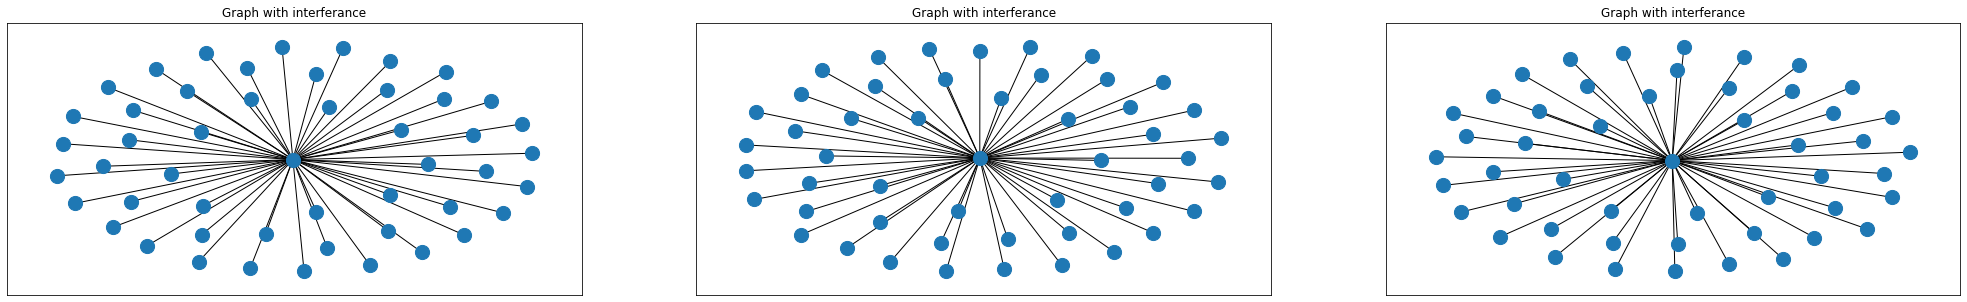

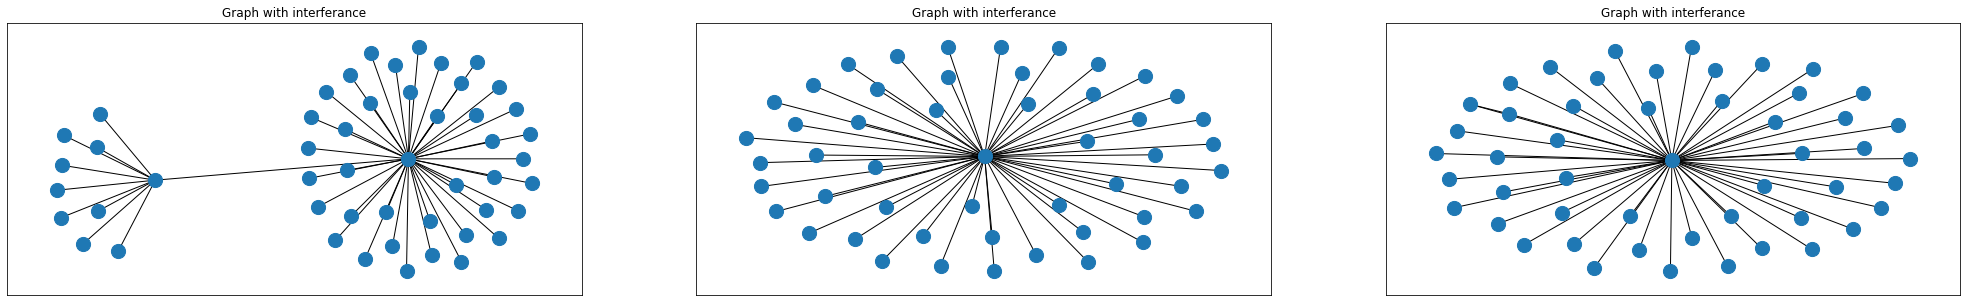

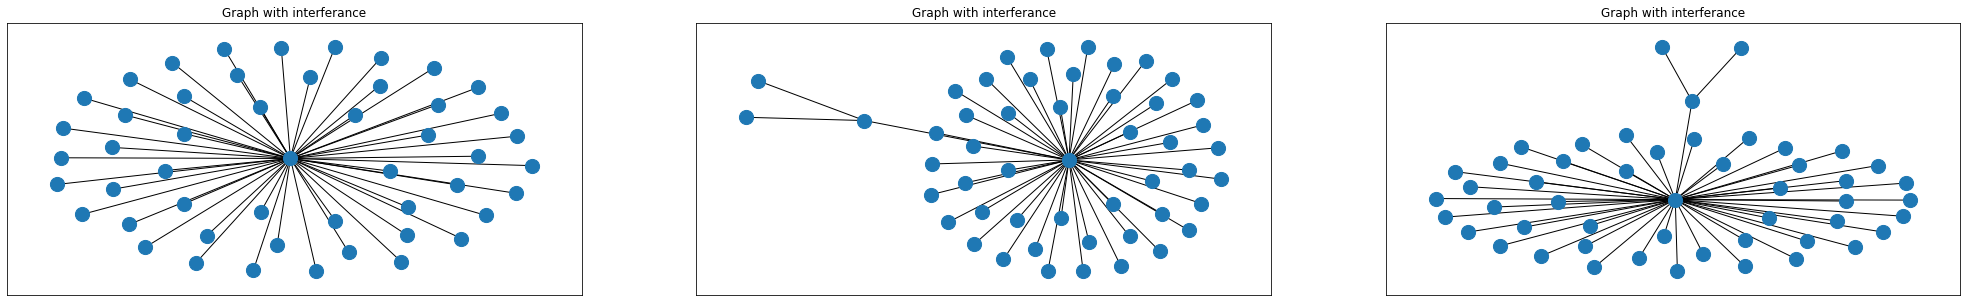

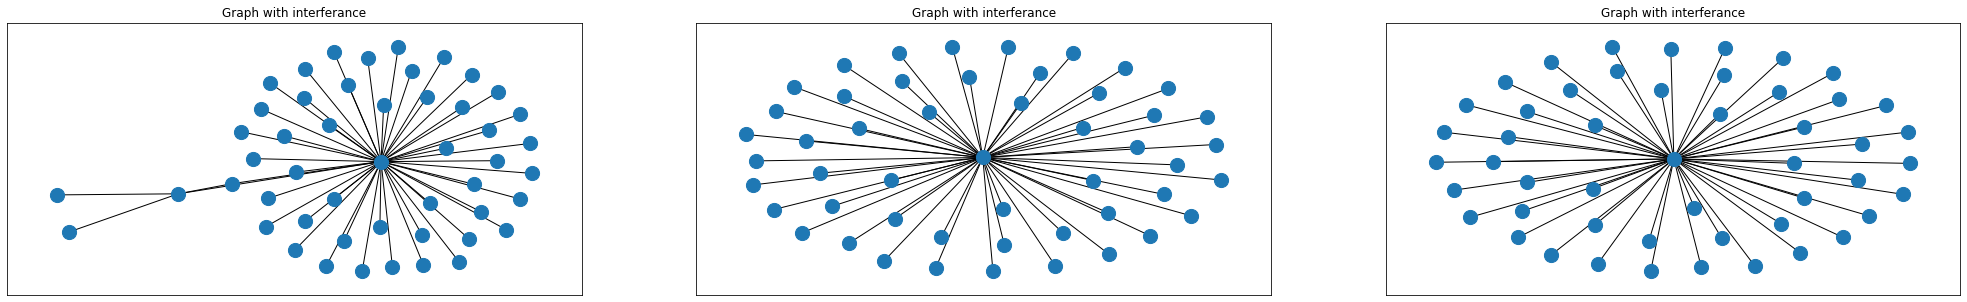

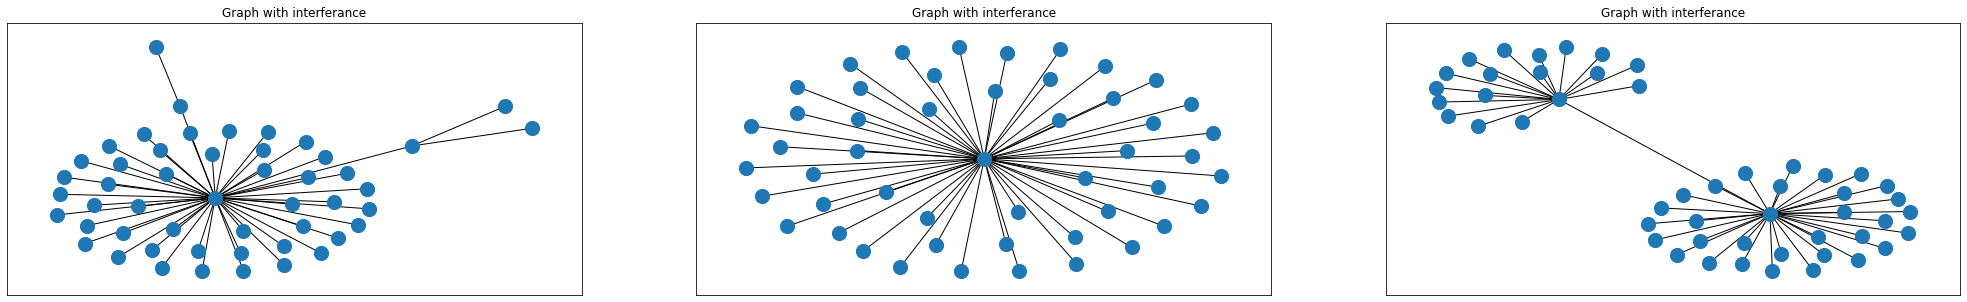

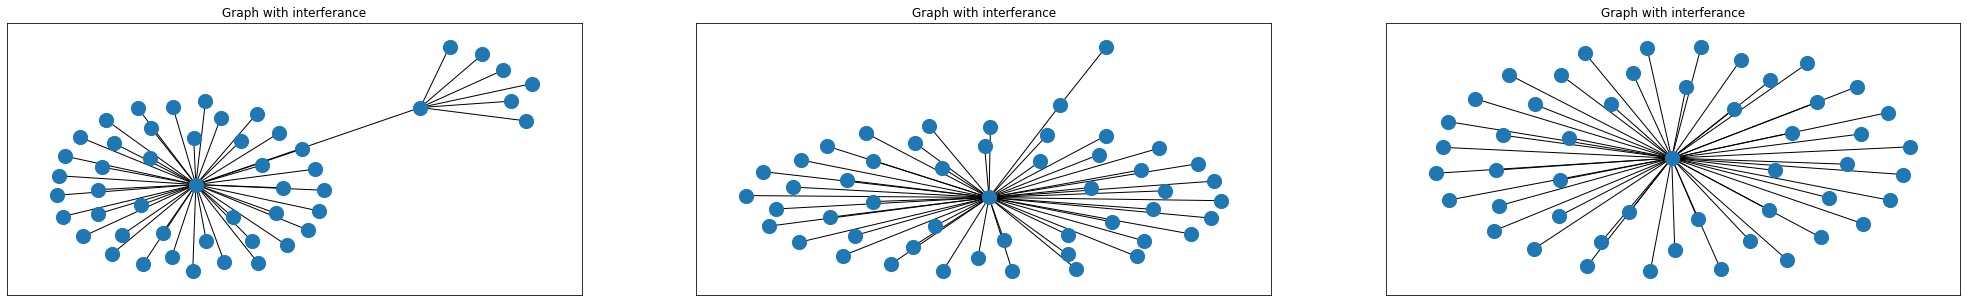

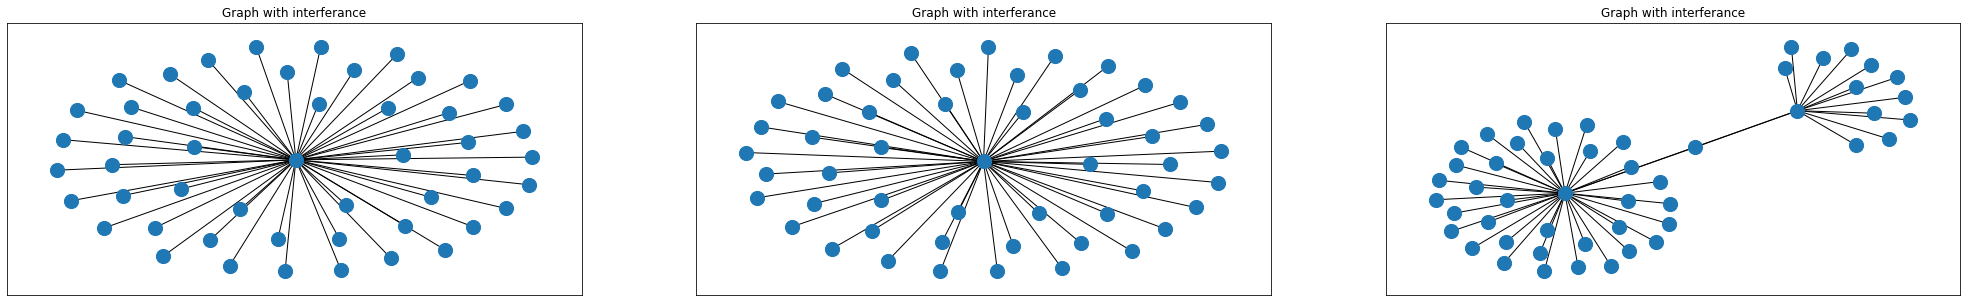

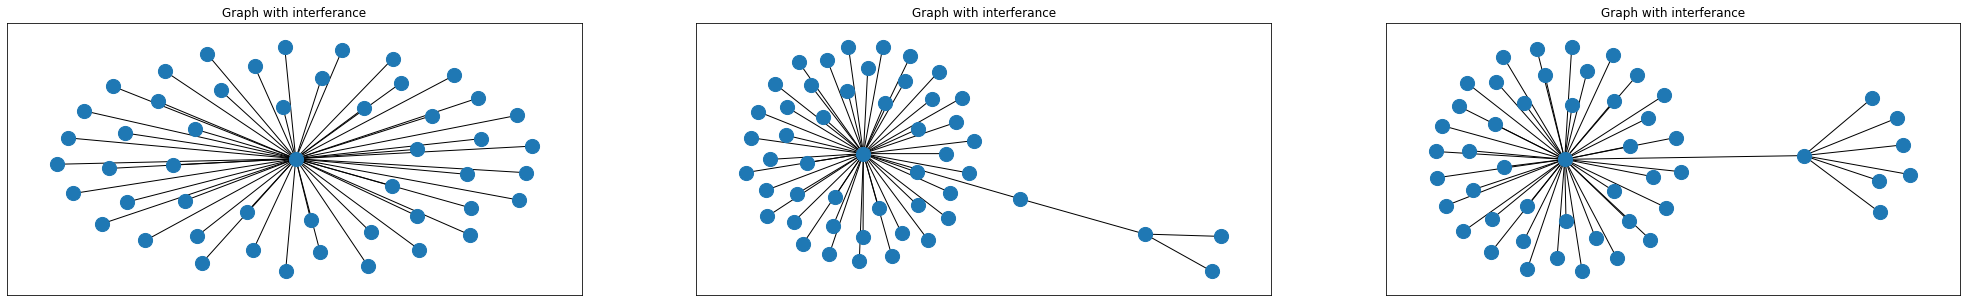

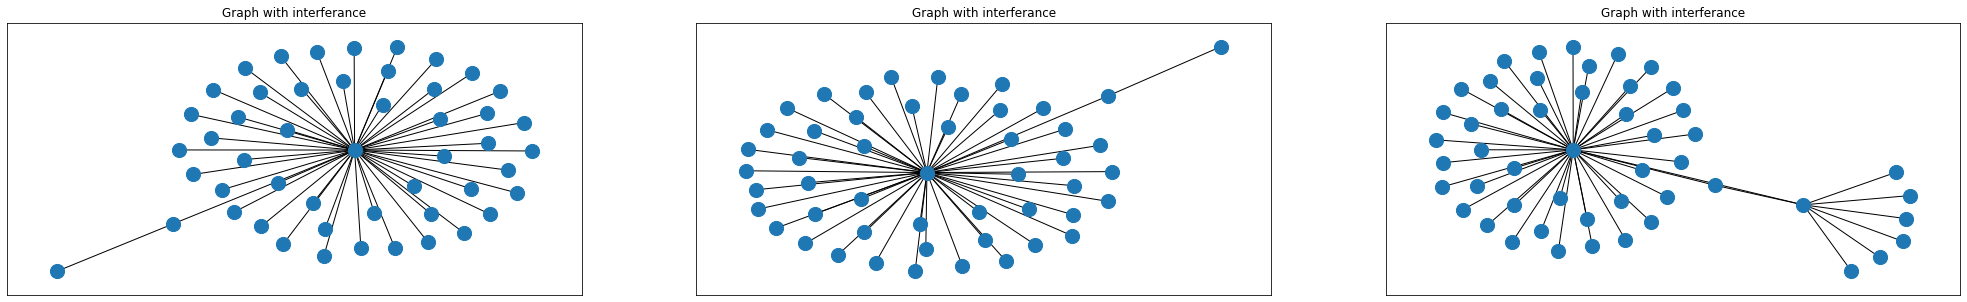

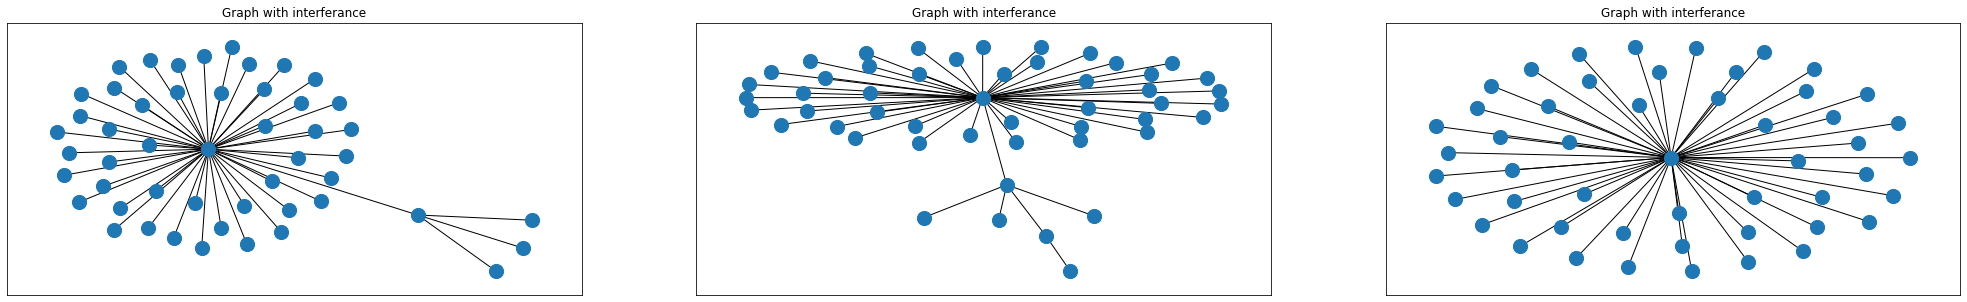

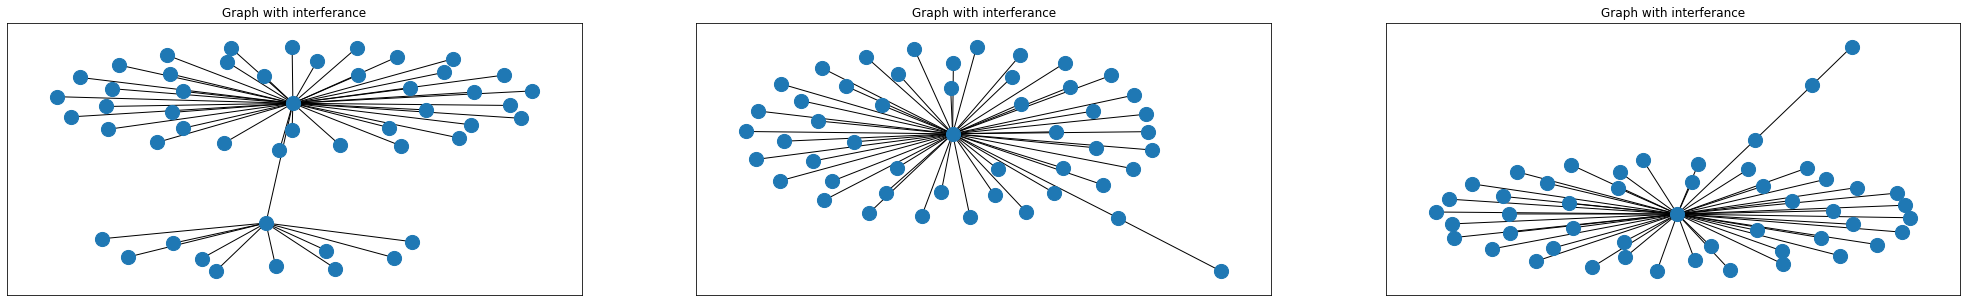

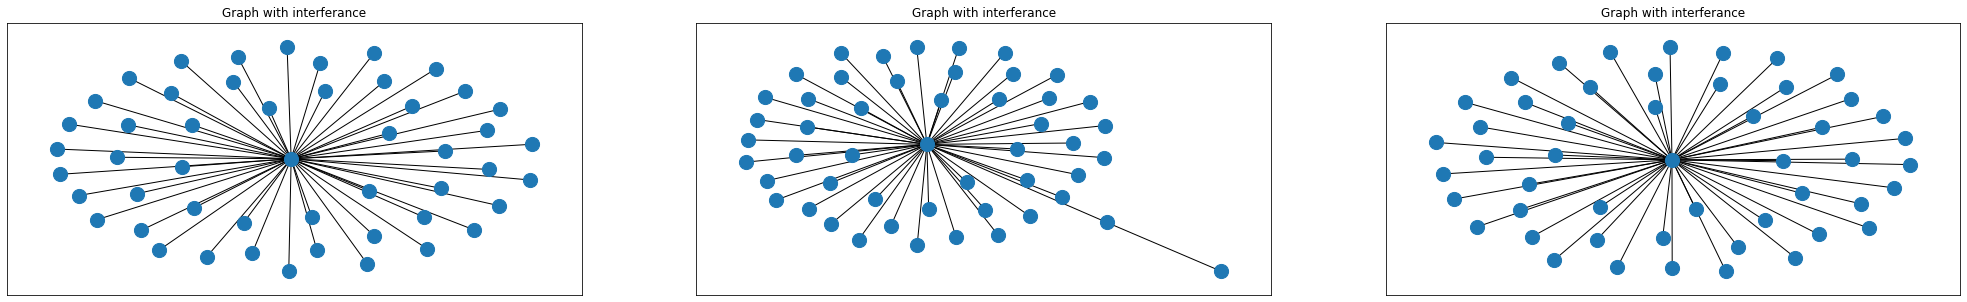

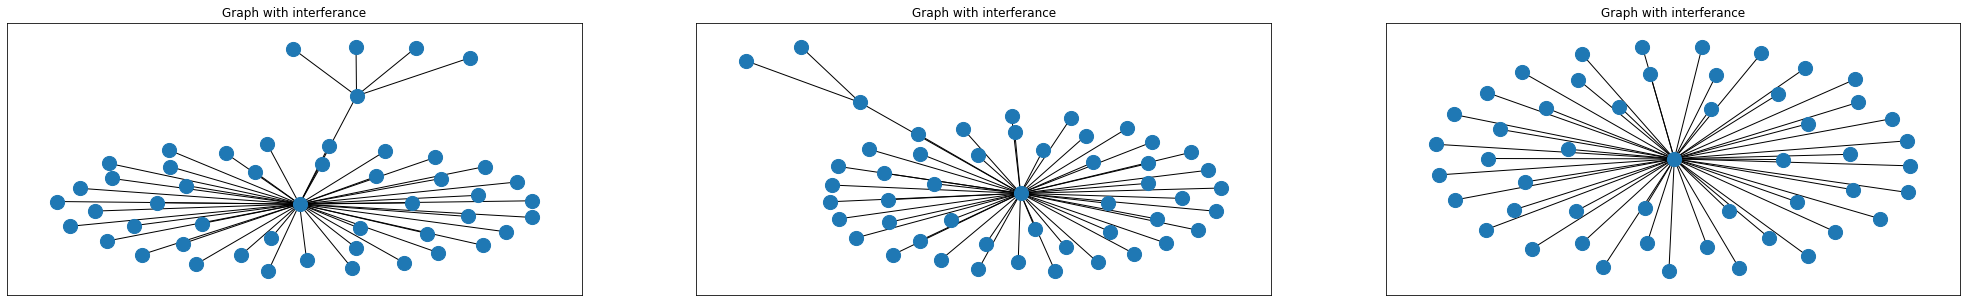

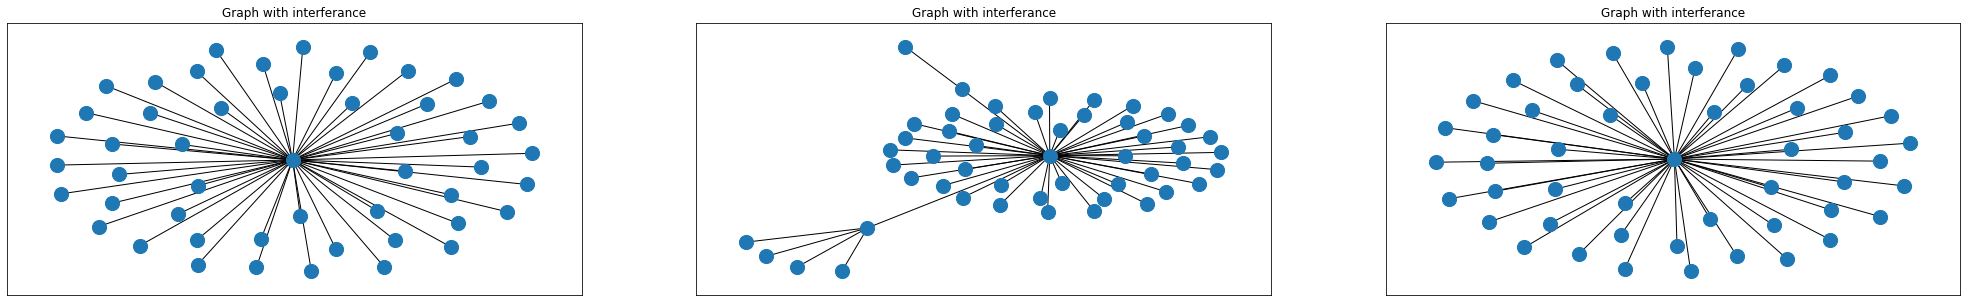

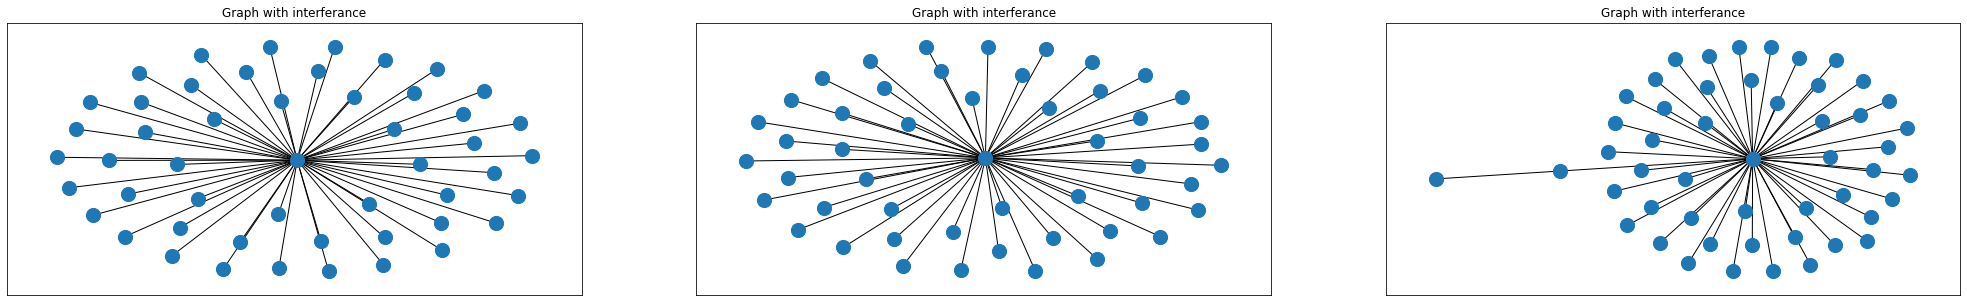

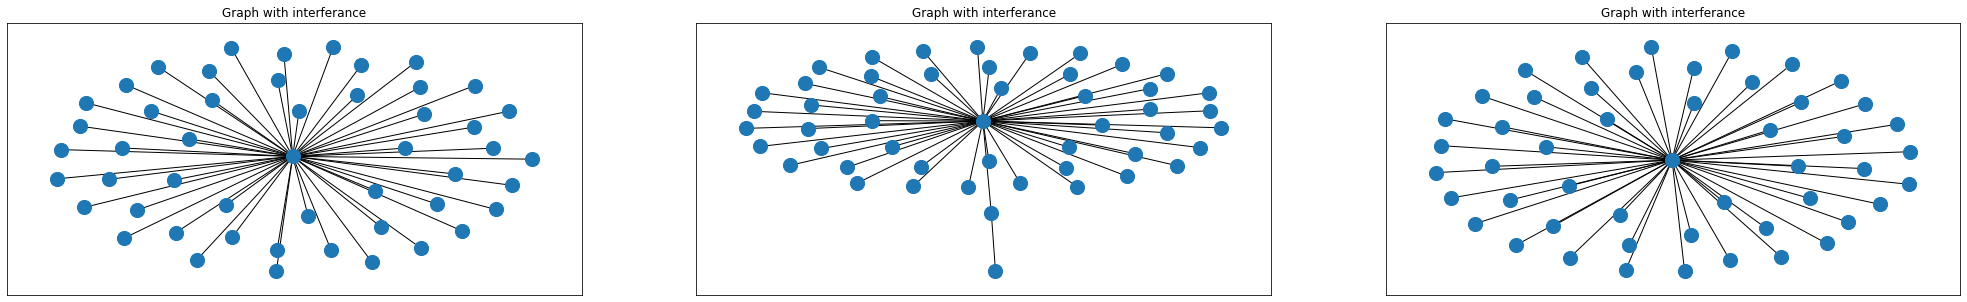

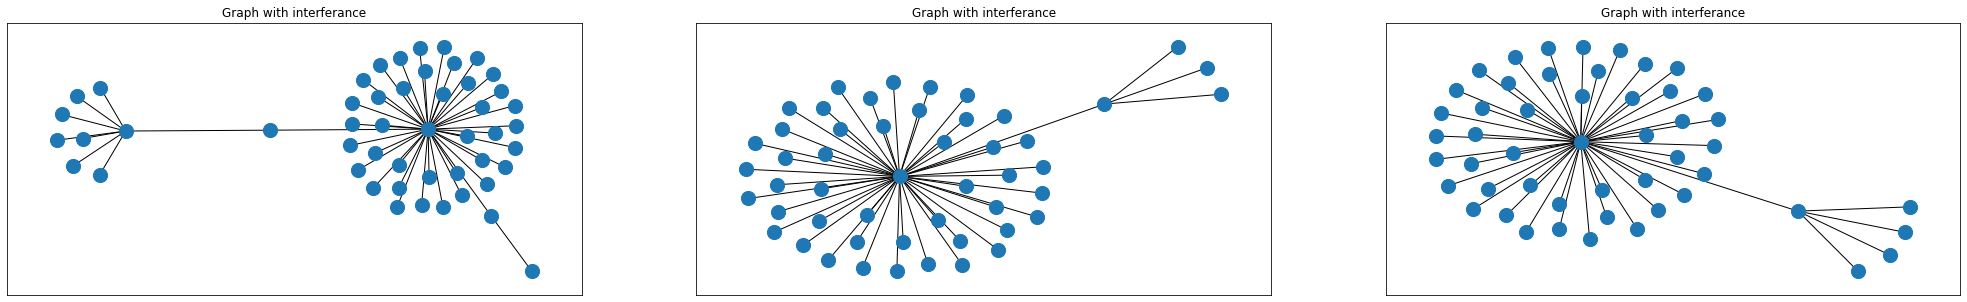

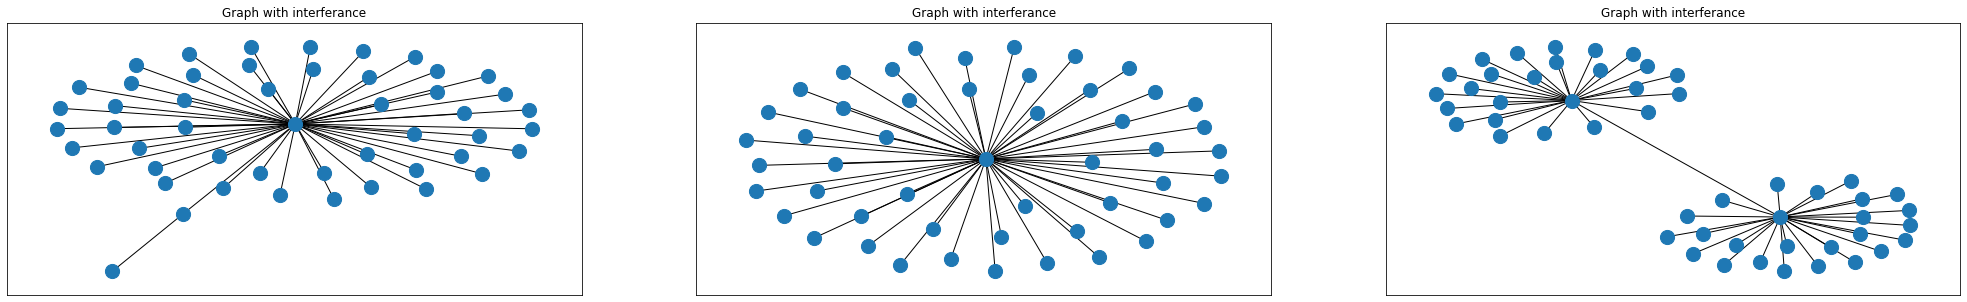

In [ ]:
# draw graph

nbNodes = 50

for i in range(20):

  #Display
  plt.figure(figsize=(35,5))
  plt.clf()
  
  #Graph Général
  ax0 = plt.subplot(131)
  ax0.set_title("Graph with interferance")
  nx.draw_networkx(generate_graph_with_interferance(nbNodes), with_labels=False, node_size=200, font_color="green", ax=ax0)
  
  #Graph max component
  ax1 = plt.subplot(132)
  ax1.set_title("Graph with interferance")
  nx.draw_networkx(generate_graph_with_interferance(nbNodes), with_labels=False, node_size=200, font_color="green", ax=ax1)
  
  #Hist Degree
  ax2 = plt.subplot(133)
  ax2.set_title("Graph with interferance")
  nx.draw_networkx(generate_graph_with_interferance(nbNodes), with_labels=False, node_size=200, font_color="green", ax=ax2)

  plt.show()

### 3️⃣ **More advanced graph formation game**
---



> Now we will make the model more interesting and more realistic. In previous part we assumed that when a link between two entities is made it is never severed. Now we will assume that entities might behave badly. They might decide to cut the link to some entities so a node can cooperate, or defect. In the first round of the game we will play the more realistic version of previous game. In the second round each entity is connected to some other entities. Now he might decide to continue to cooperate and stay connected to all previous links. Or it might decide to defect and choose another node to connect to. However this will results into bad karma. We assume that each node will have a karma value equal to the percentage of time it has defected in the past.. Design a new value evaluation that will use this karma value to decide to connect to another node. Test if your method can results into a stable connected graph, i.e., the resulting graph is connecting a very large percentage of entities all the time. Make some analysis of the distribution of entity value, of its karma, etc





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


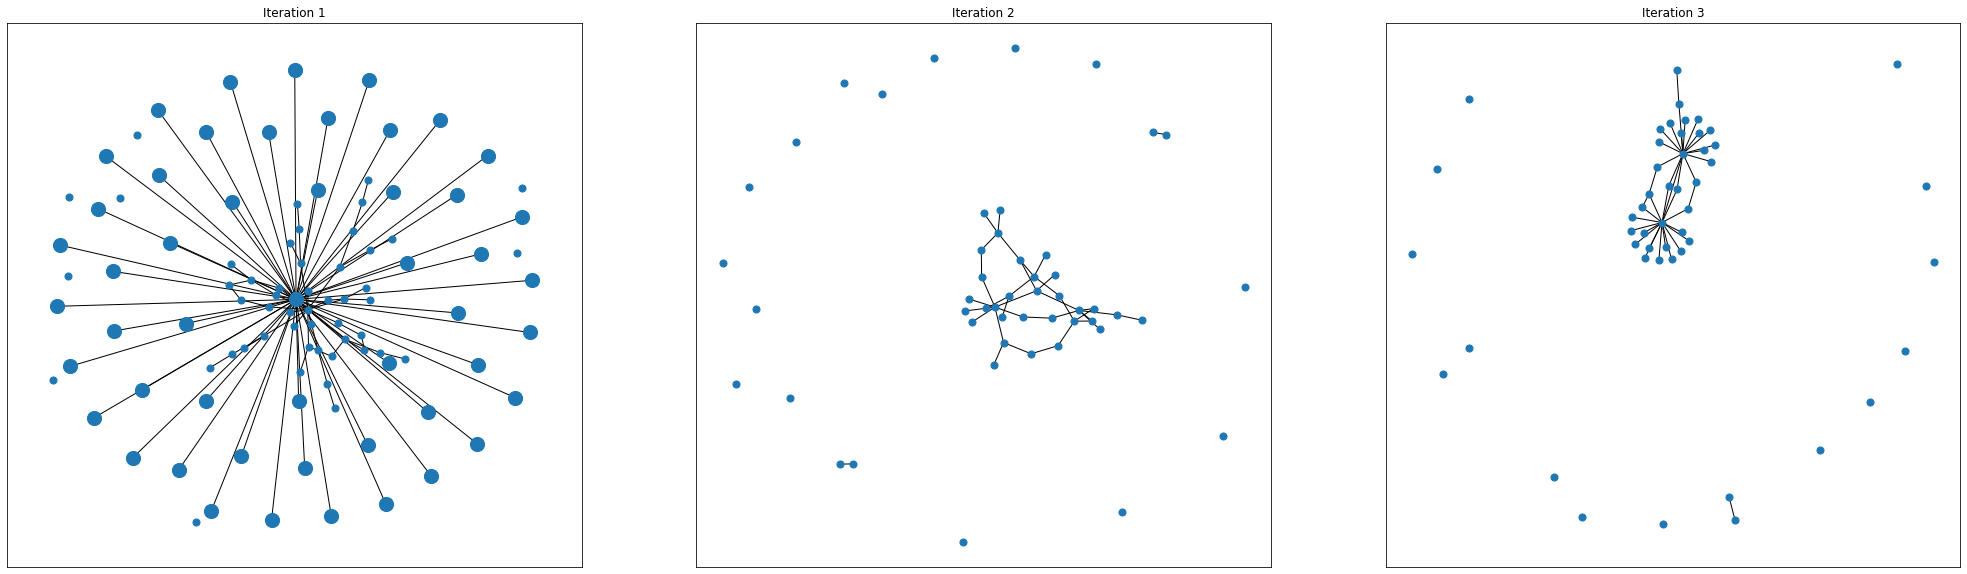

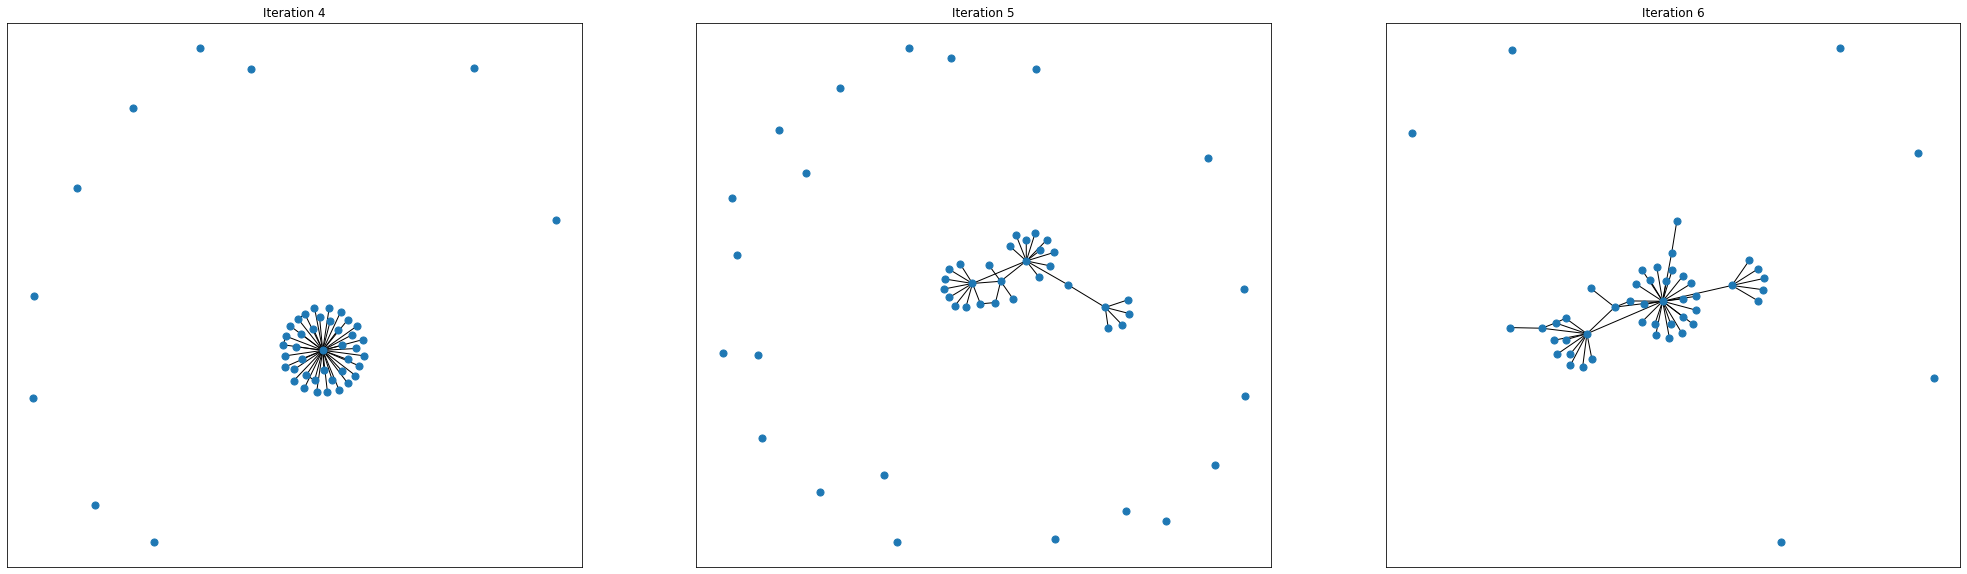

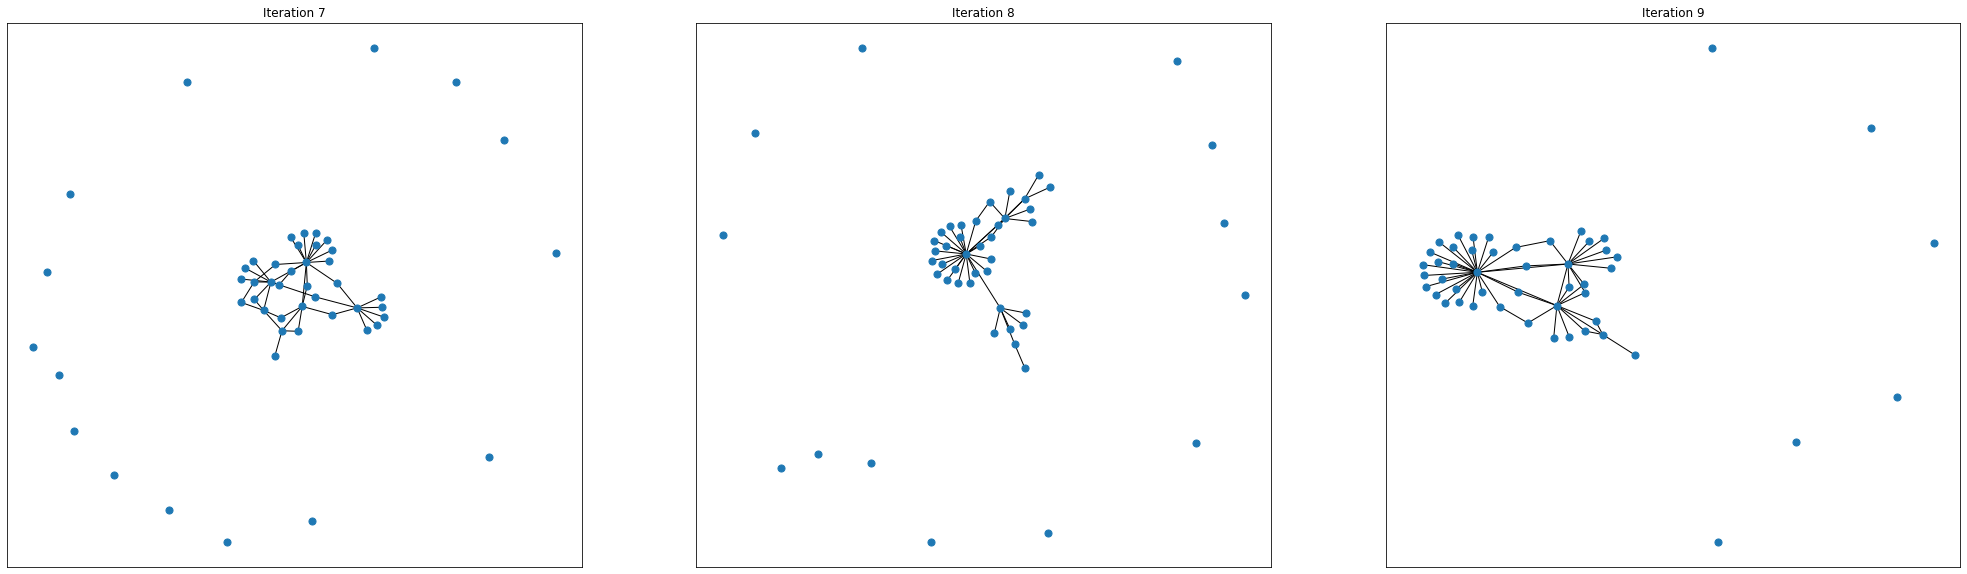

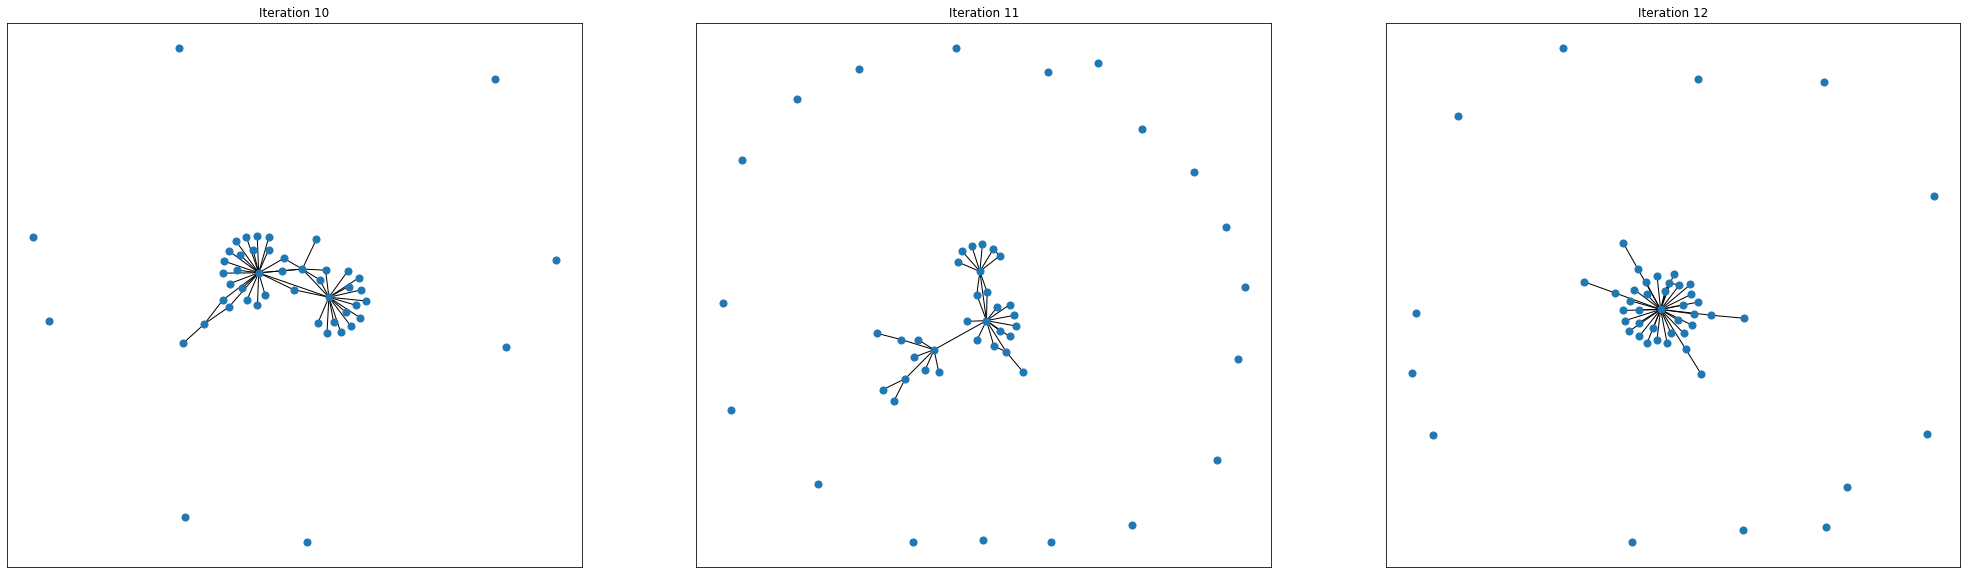

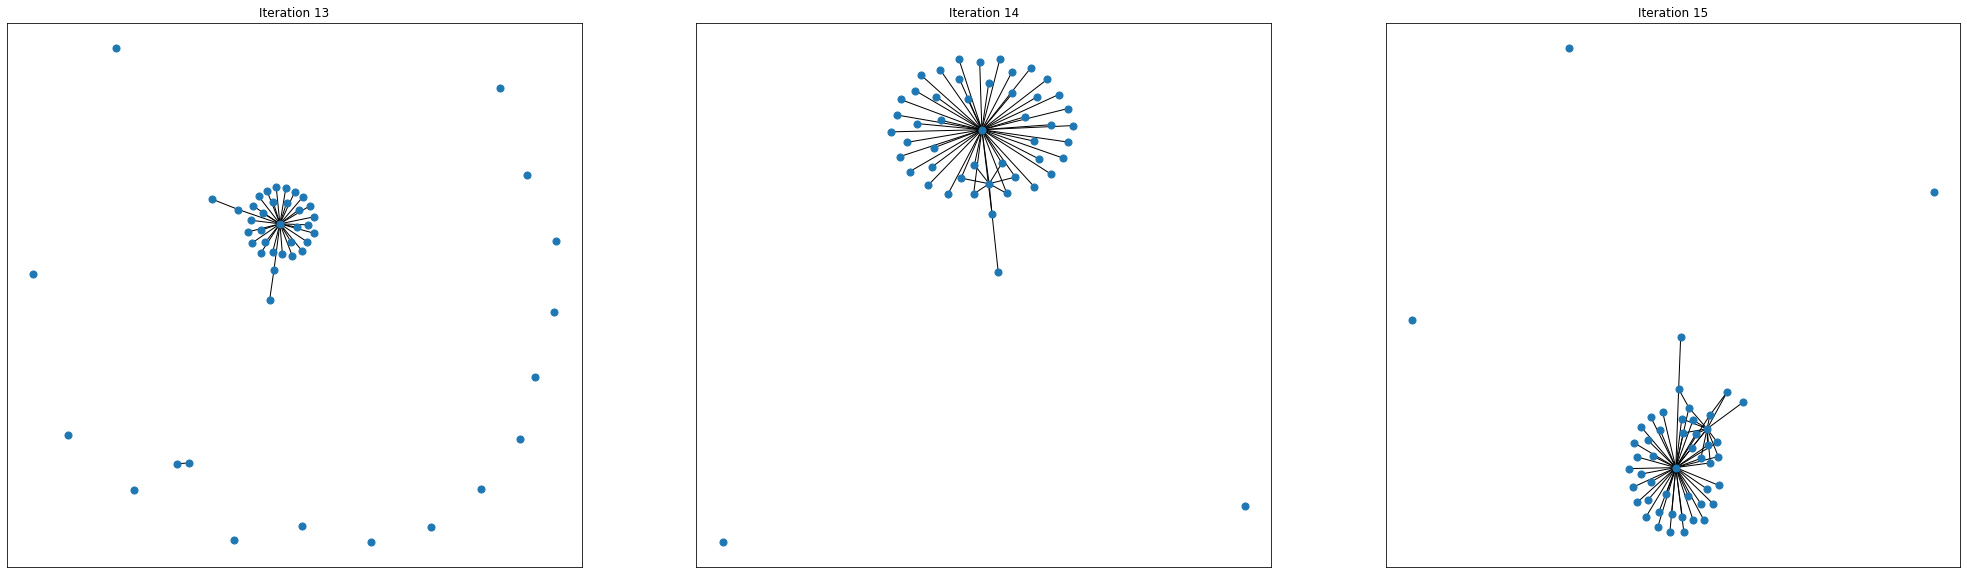

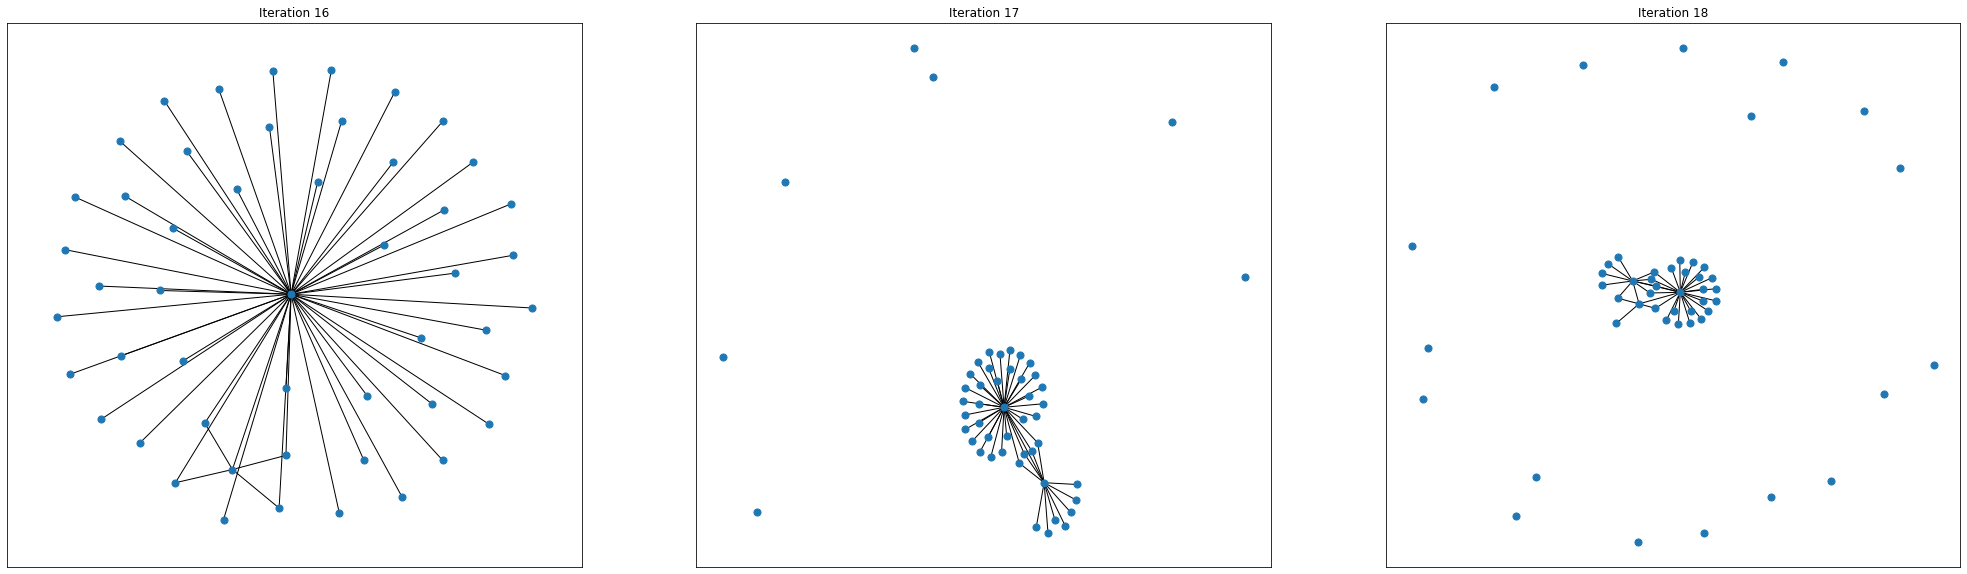

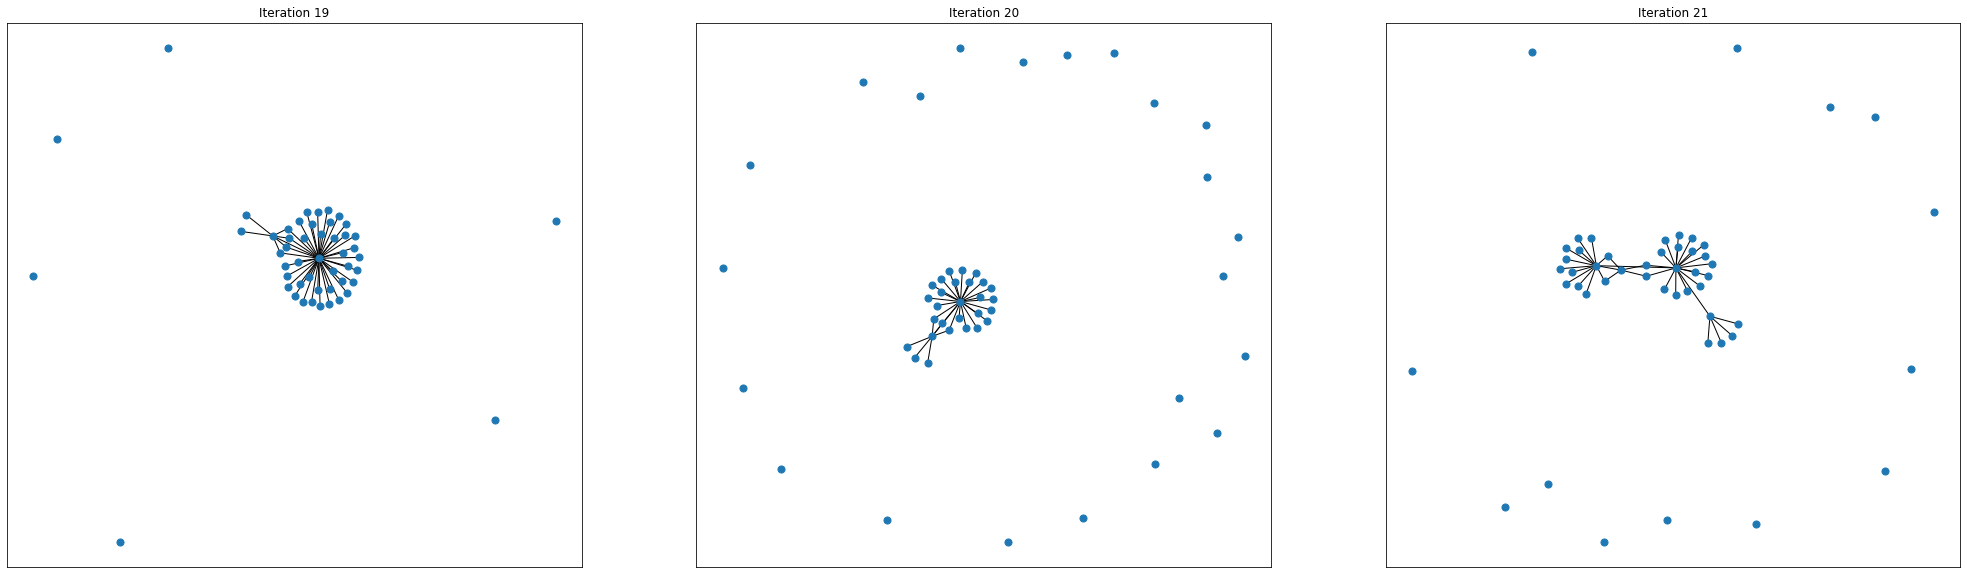

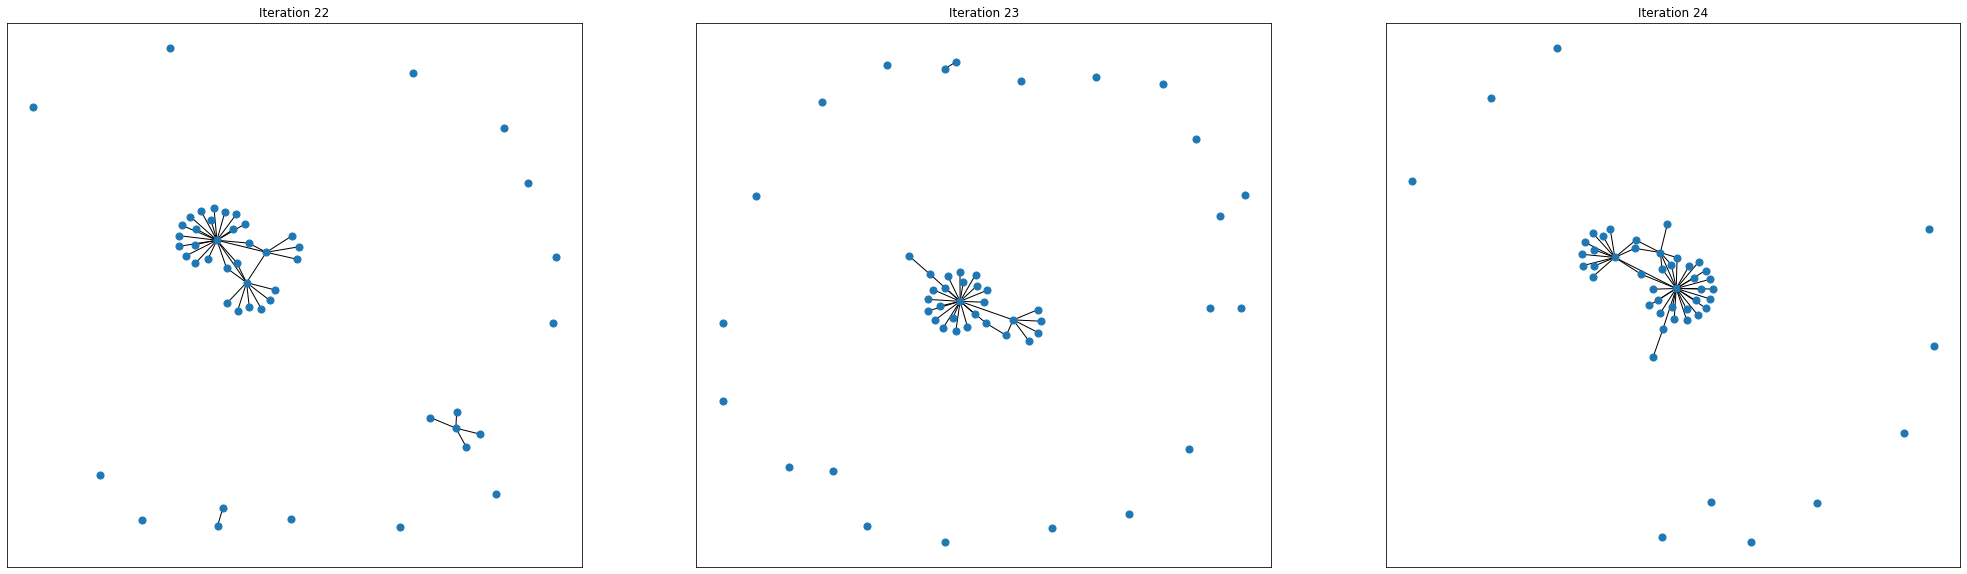

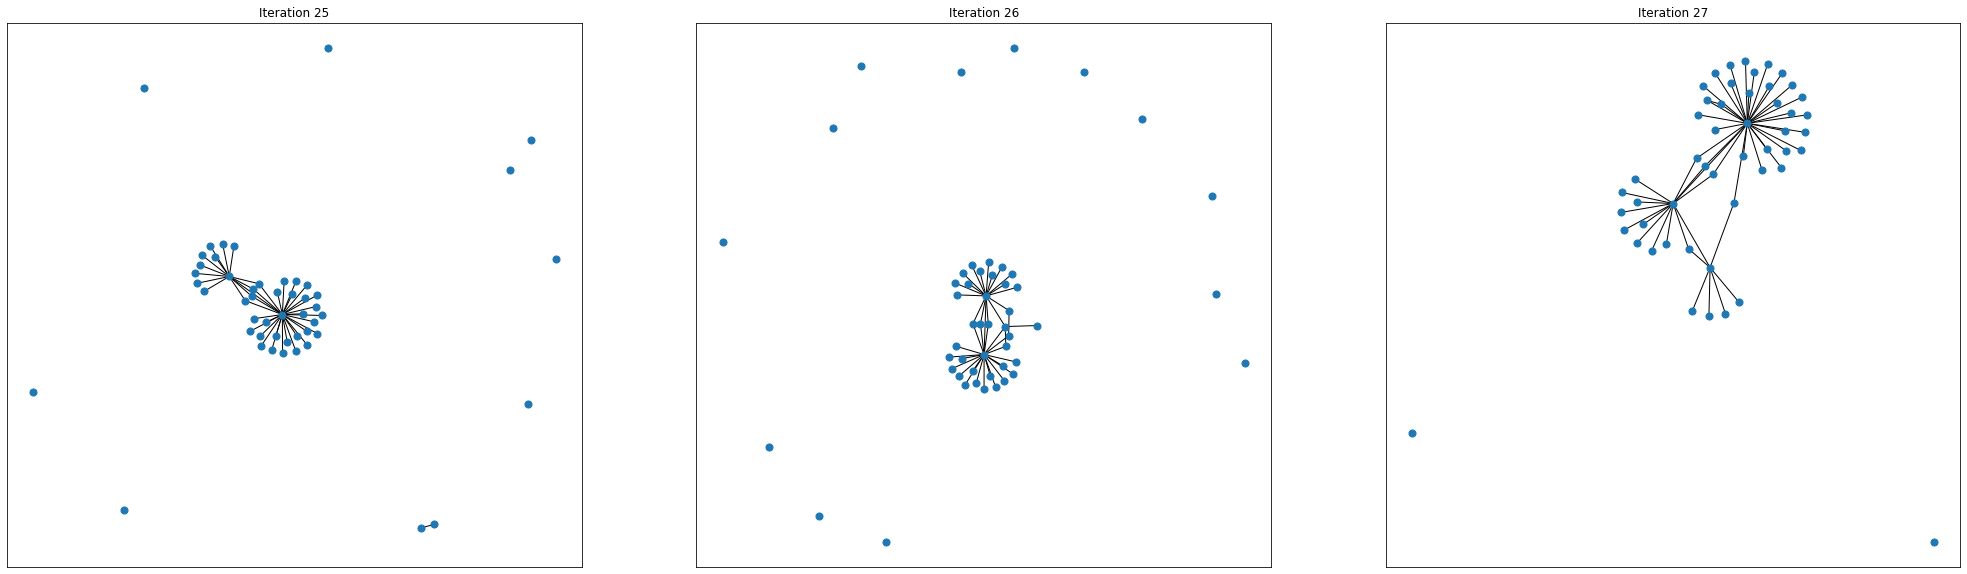

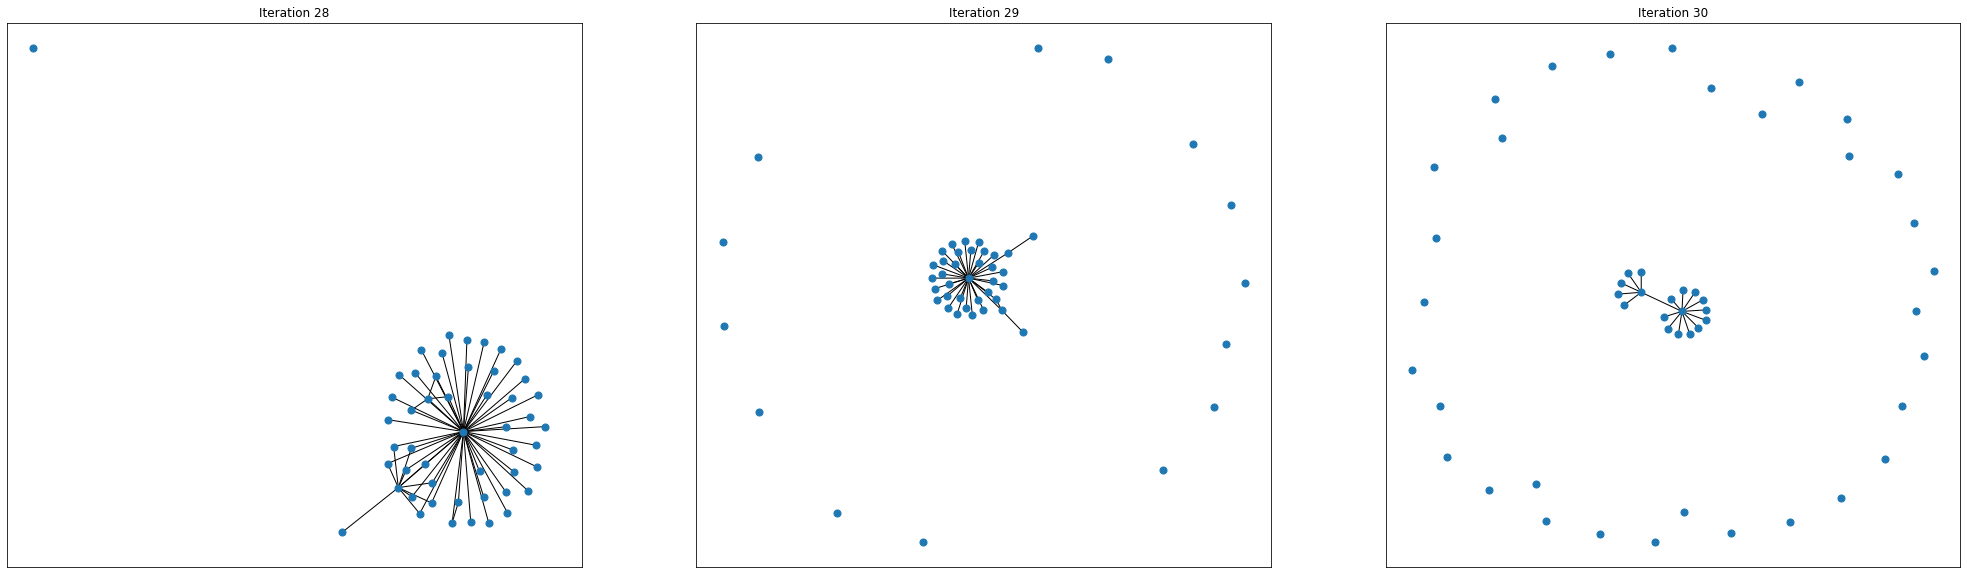

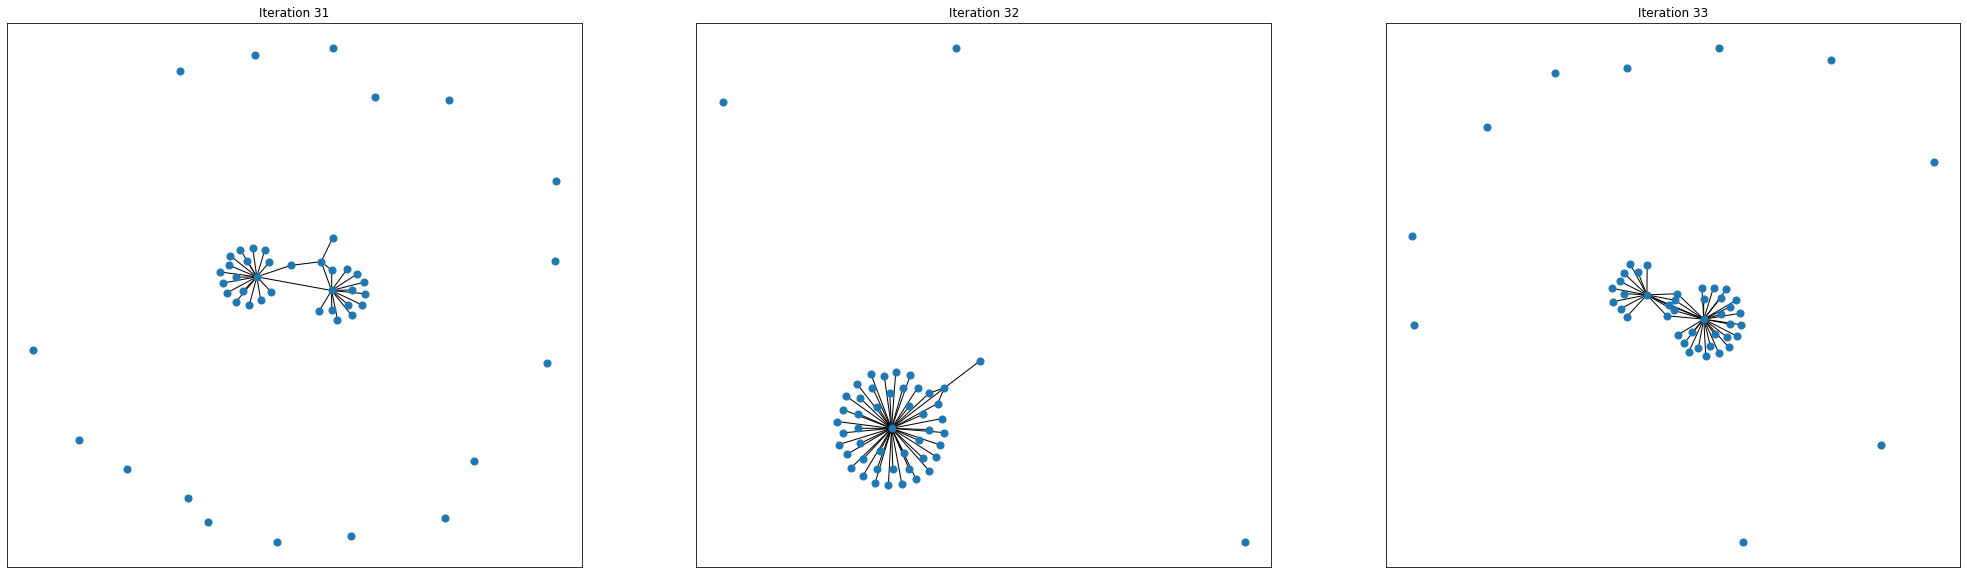

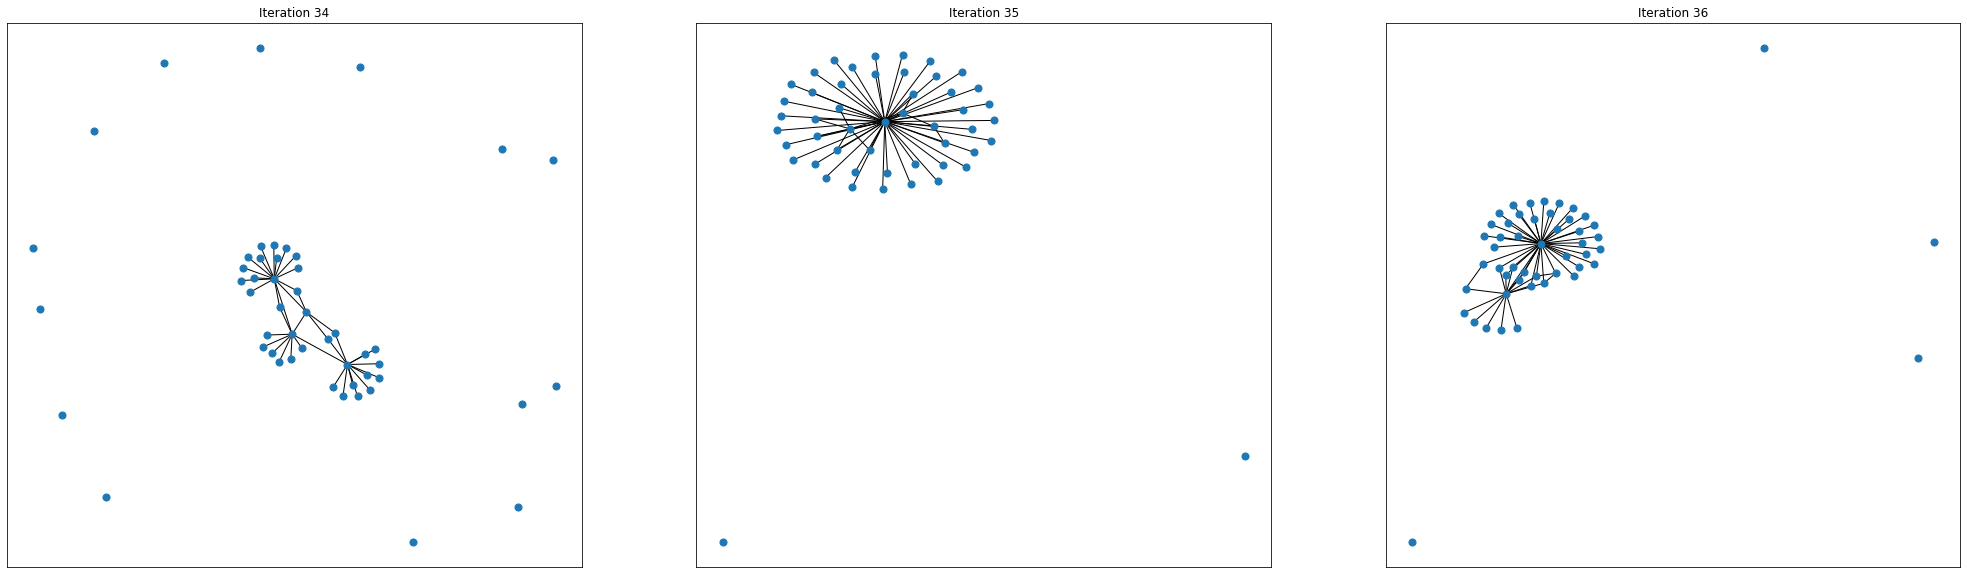

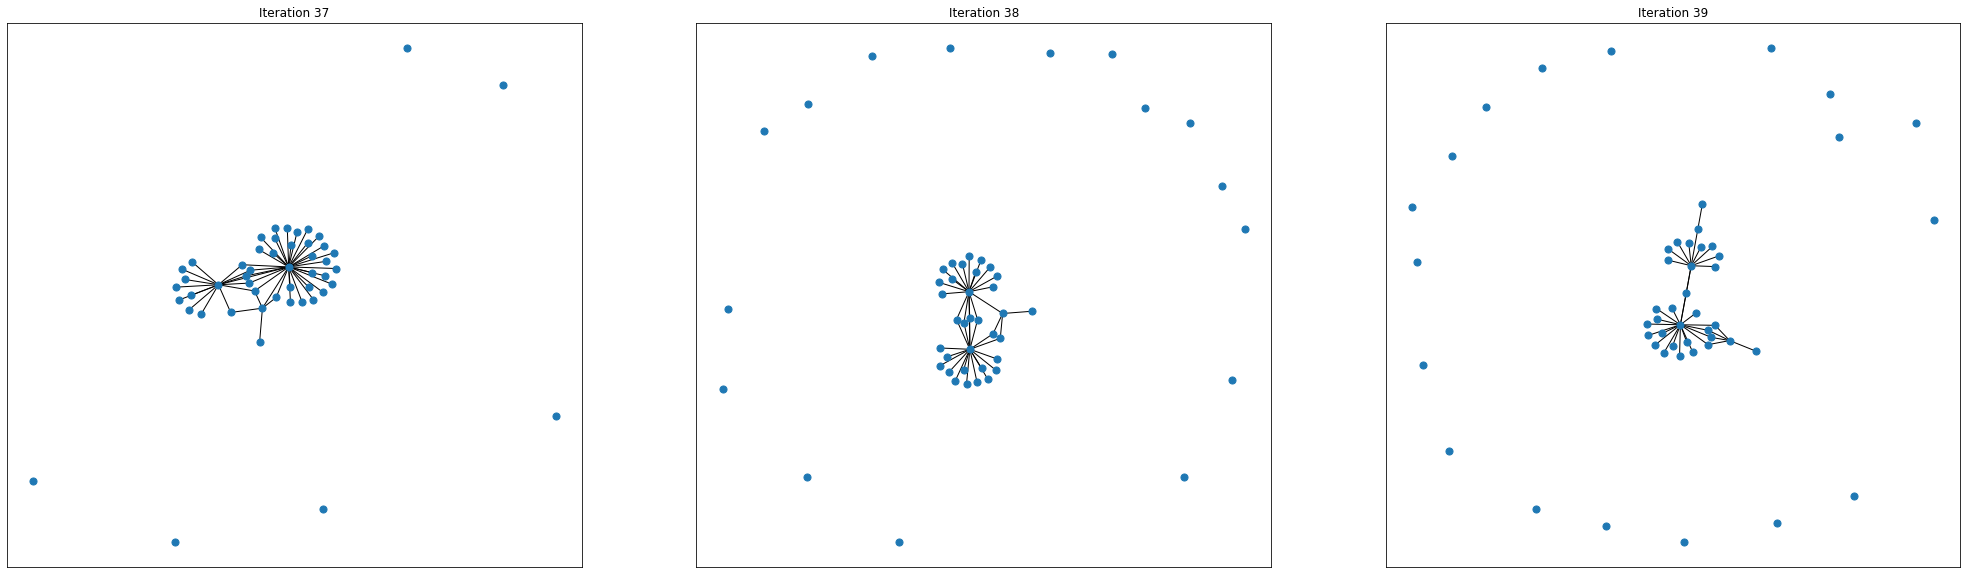

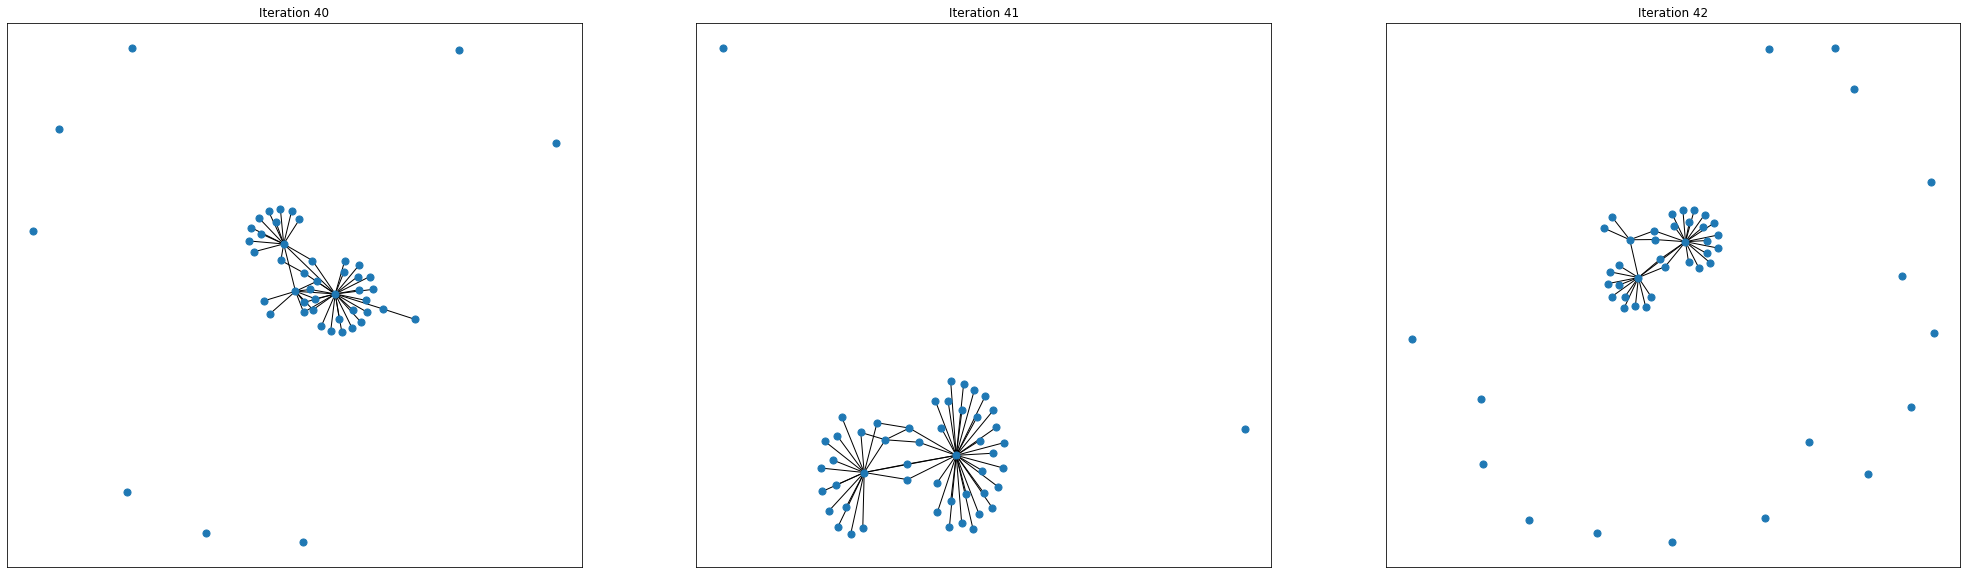

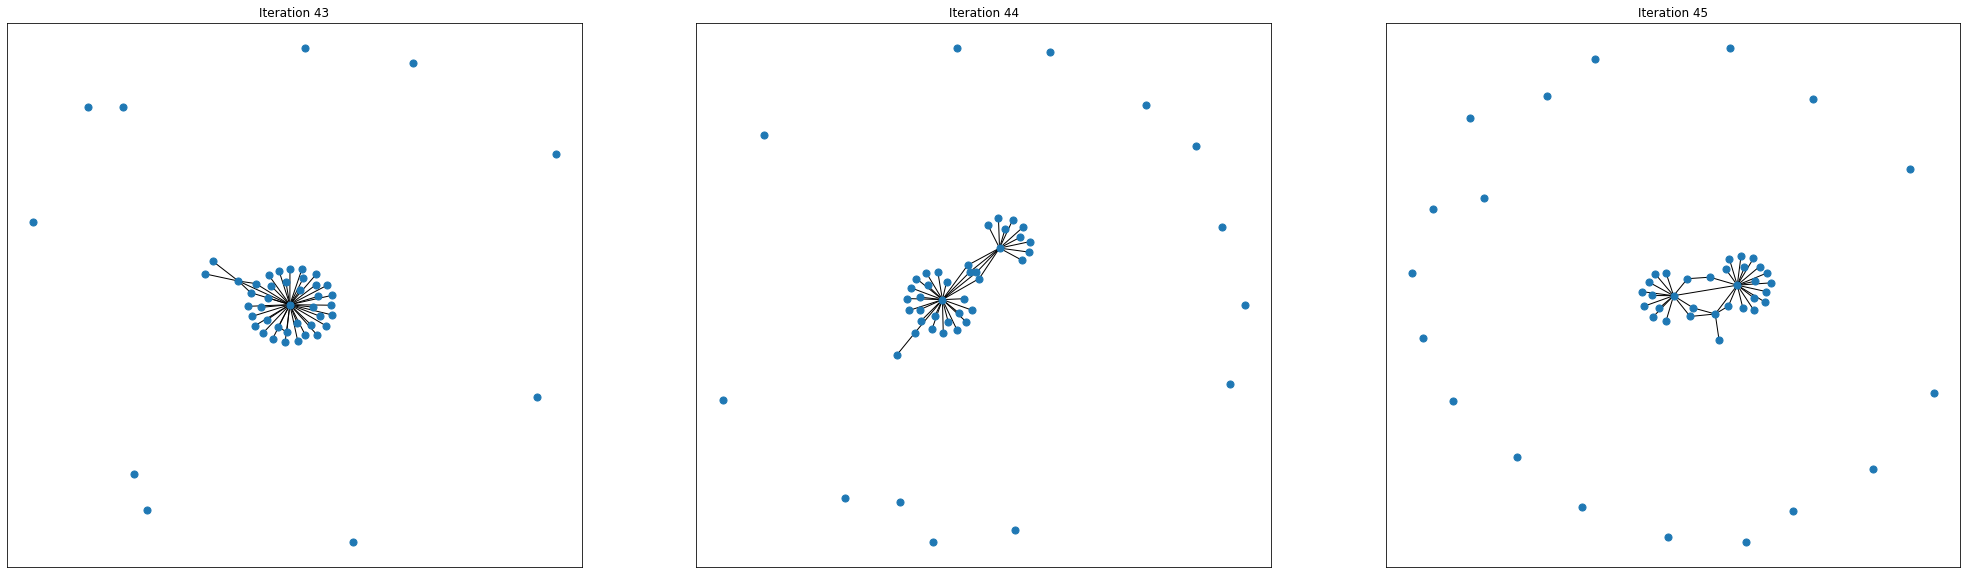

<Figure size 2520x720 with 0 Axes>

In [ ]:
nbNodes = 50
nbIterations = 45;

G = generate_graph_with_interferance(nbNodes)

# variables for general analysis
maxDegrees = []
minKarma = []
maxKarma = []

# variables for specific node analysis
nodeId = random.randint(0,nbNodes-1)
nodeAnalysisDegrees = []
nodeAnalysisKarma=[]
nodeAnalysisDefect=[]
nodeAnalysisDecision=[]

plt.figure(figsize=(35,10))
plt.clf()

nx.set_node_attributes(G, 0, 'karma')
nx.set_node_attributes(G, 0, 'nbDefect')
nx.set_node_attributes(G, 0, 'nbDecision')
allNodes = list(G.nodes())
random.shuffle(allNodes)

ax = plt.subplot(1,3,1)
ax.set_title(f"First graph with interferance")
nx.draw_networkx(G, with_labels=False, node_size=200, font_color="green", ax=ax)

for i in range(nbIterations):
  allNodes = list(G.nodes())
  random.shuffle(allNodes)

  for node in allNodes:
    # List of all nodes with their values, current one (randomNode) removed
    nodeValues = list(G.nodes(data=True))
    nodeValues.remove((node,G.nodes[node]))

    nodeNeighbours = G[node]

    G.nodes[node]['nbDecision'] += len(nodeNeighbours)
    nodesToBreakEdge = [neighbourNode for neighbourNode in nodeNeighbours if random.random() >= 0.5 ]

    G.nodes[node]['nbDefect'] += len(nodesToBreakEdge)
    for nodeToBreakEdge in nodesToBreakEdge: 
      G.remove_edge(node,nodeToBreakEdge)
      G.nodes[node]['value'] -= 1
      G.nodes[nodeToBreakEdge]['value'] -= 1

    if G.nodes[node]['nbDecision'] > 0 :
      G.nodes[node]['karma'] = G.nodes[node]['nbDefect'] / G.nodes[node]['nbDecision']

    nodesToConnect = list(G.nodes(data=True))
    nodesToConnect.remove((node,G.nodes[node]))
    nodesToConnect = [item for item in nodesToConnect if item not in nodesToBreakEdge]
    
    # Get the lower karma value of all nodes
    lowerKarmaValue = min(nodesToConnect,key=lambda n:n[1]['karma'])[1]['karma']
    minKarmaNodes = list(filter(lambda n: n[1]['karma'] == lowerKarmaValue, nodesToConnect))
    lowerKarmaNode = random.choice(minKarmaNodes)[0] 

    if G.has_edge(node,lowerKarmaNode) == False :
        G.add_edge(node,lowerKarmaNode)
        G.nodes(data=True)[node]['value'] += 1
        G.nodes[lowerKarmaNode]['value'] += 1

    # Get the higher value of all nodes
    nodes = list(G.nodes(data=True))
    higherValue = max(nodes,key=lambda n:n[1]['interferedValue'])[1]['interferedValue']
    nodes = list(filter(lambda n: n[1]['interferedValue'] == higherValue, nodes))
    node = random.choice(nodes)[0]

  ax = plt.subplot(1,3,(i)%3+1)
  # ax.axis("off")
  ax.set_title(f"Iteration {i+1}")
  nx.draw_networkx(G, with_labels=False, node_size=50, font_color="green", ax=ax)
  if (i%3 == 2):
    plt.show()
    plt.figure(figsize=(35,10))
    plt.clf()

  maxDegrees.append(max([val for (node, val) in G.degree()]))
  minKarma.append(min([node[1]["karma"] for node in G.nodes(data=True)]))
  maxKarma.append(max([node[1]["karma"] for node in G.nodes(data=True)]))

  nodeAnalysisDegrees.append(G.degree()[nodeId])
  nodeAnalysisKarma.append(G.nodes(data=True)[nodeId]["karma"])
  nodeAnalysisDefect.append(G.nodes(data=True)[nodeId]["nbDefect"])
  nodeAnalysisDecision.append(G.nodes(data=True)[nodeId]["nbDecision"])

plt.show();

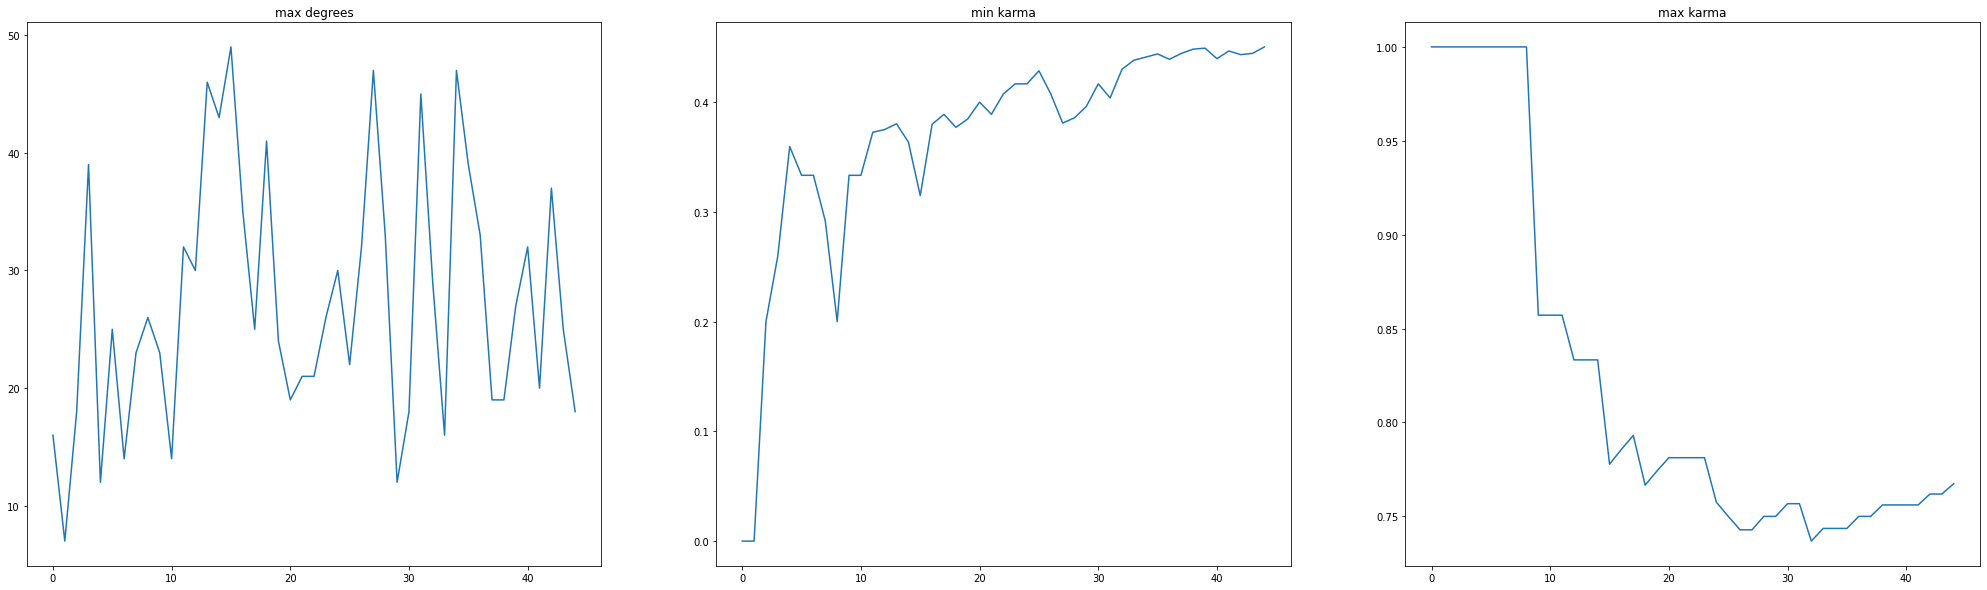

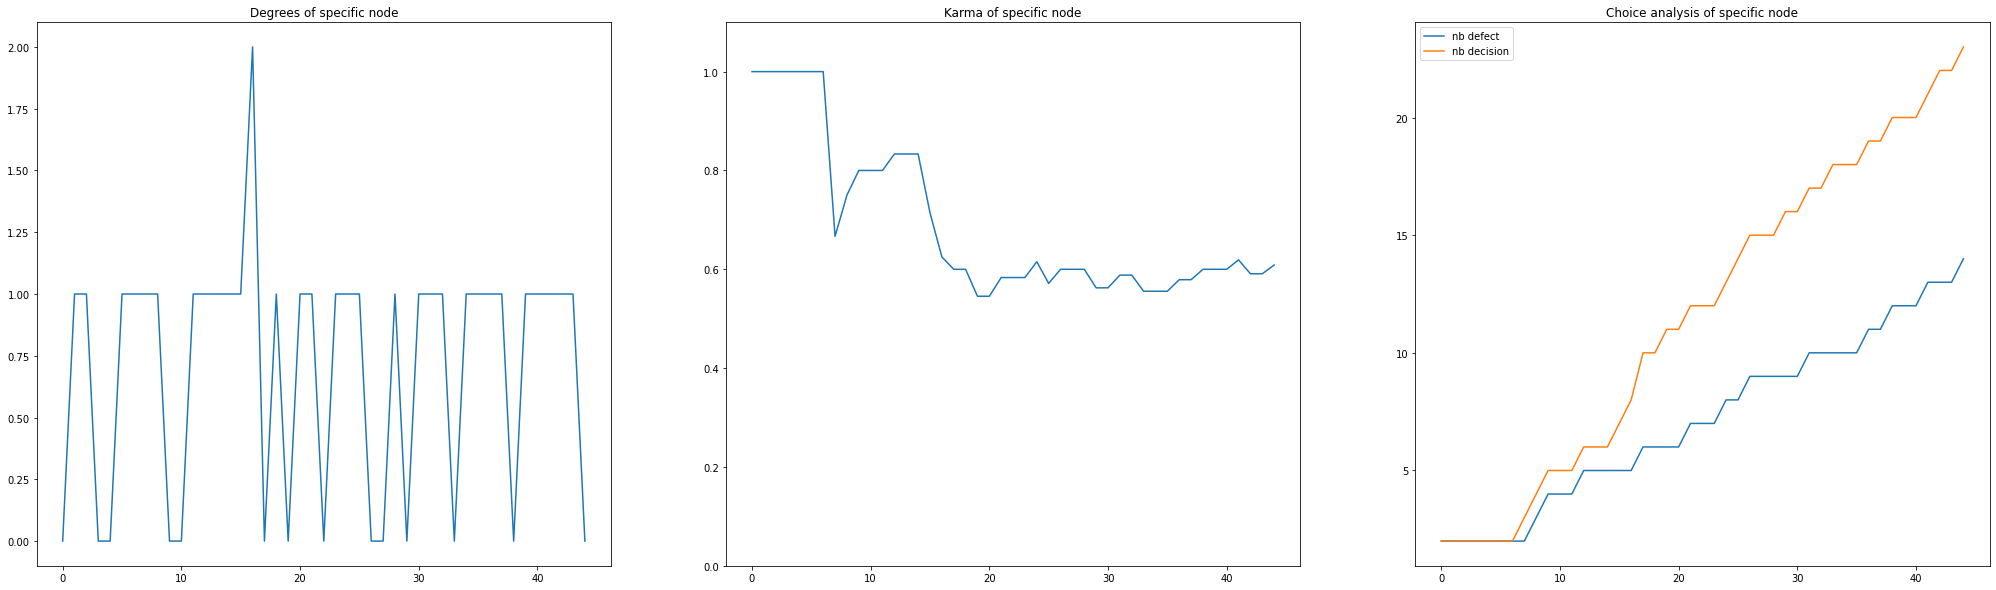

In [ ]:
#analysis

plt.figure(figsize=(35,10))
plt.clf()

ax0 = plt.subplot(131)
ax0.plot(maxDegrees)
ax0.set_title(f"max degrees")

ax1 = plt.subplot(132)
ax1.plot(minKarma)
ax1.set_title(f"min karma")

ax2 = plt.subplot(133)
ax2.plot(maxKarma)
ax2.set_title(f"max karma")

plt.show();

plt.figure(figsize=(35,10))
plt.clf()

ax0 = plt.subplot(131)
ax0.plot(nodeAnalysisDegrees)
ax0.set_title(f"Degrees of specific node")

ax1 = plt.subplot(132)
ax1.plot(nodeAnalysisKarma)
ax1.set_title(f"Karma of specific node")
ax1.set_ylim([0, 1.1])

ax2 = plt.subplot(133)
ax2.plot(nodeAnalysisDefect, label='nb defect')
ax2.plot(nodeAnalysisDecision, label='nb decision')
ax2.legend()
ax2.set_title(f"Choice analysis of specific node")

plt.show()